In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# 데이터 불러옴
import os
data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/pet/data.csv", index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14803 entries, 0 to 14802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      14803 non-null  object
 1   날짜      14803 non-null  int64 
 2   분류      14803 non-null  object
dtypes: int64(1), object(2)
memory usage: 462.6+ KB


In [ ]:
# 정규 표현식으로 전처리
import re

def preprocessing(text):
    text = re.sub(r"[^가-힣0-9\s]", " ", text) #한글이랑 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text) #중복 공백 없애기
    text = text.strip() #앞뒤 공백 없애기
    return text

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 18.32 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 38.1 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-01-05 00:11:38--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.2, 18.205.93.0, ...
Connecting to 

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
from tqdm import tqdm
tqdm.pandas()

# 명사만 남게 전처리
data["명사"] = data["제목"].map(mecab.nouns).astype(str).progress_map(preprocessing)

100%|██████████| 14803/14803 [00:00<00:00, 101092.33it/s]


In [ ]:
data

,제목,날짜,분류,명사
0,은평구 반려동물 문화교실 댕댕이 스쿨 운영,2020,뉴스,은평구 반려 동물 문화 교실 댕댕이 스쿨 운영
1,새해부터 반려동물 미용사 나무의사도 신중년 고용장려금 받는다,2020,뉴스,새해 반려 동물 미용사 나무 의사 중년 고용 장려금
2,반려식물로 코로나 우울 해소,2020,뉴스,반려 식물 코로나 우울 해소
3,우리 아이와 반려동물 함께 생활해도 괜찮을까,2020,뉴스,우리 아이 반려 동물 생활
4,영상 반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝,2020,뉴스,영상 반려 동물 식품 세계 정부 지원 글로벌 기업
...,...,...,...,...
14798,펫 금융 계좌를 이용한 펫 금융 서비스 제공 장치 및 그 동작 방법,2021,특허,펫 금융 계좌 이용한 펫 금융 서비스 제공 장치 동작 방법
14799,맞춤형 추천 서비스를 제공하는 온라인 판매 방법,2018,특허,맞춤 추천 서비스 제공 온라인 판매 방법
14800,자동 물내림 장치,2018,특허,자동 물 내림 장치
14801,애완동물 리드줄 제어장치 및 방법,2020,특허,애완 동물 리드 줄 제어 장치 방법


In [ ]:
from math import log

In [ ]:
news = data.loc[data["분류"]=="뉴스"]
kipris = data.loc[data["분류"]=="특허"]

In [ ]:
news2020 = news.loc[news["날짜"]==2020, "명사"].values.tolist()
news2021 = news.loc[news["날짜"]==2021, "명사"].values.tolist()
news2022 = news.loc[news["날짜"]==2022, "명사"].values.tolist()

In [ ]:
# tf-idf 구하기위한 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer
import codecs

In [ ]:
def tfidf(docs):
    cv = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)

    tfidf = cv.fit_transform(docs)

    word_count = pd.DataFrame({
        '단어': cv.get_feature_names(),
        'tf-idf': tfidf.sum(axis=0).flat
    })

    return word_count.sort_values('tf-idf', ascending=False)

In [ ]:
tfidf2020 = tfidf(news2020)
tfidf2020

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
23,동물,667.450154
30,반려,657.321748
7,건강,91.094996
29,문화,79.993412
85,출시,74.600880
...,...,...
35,복귀,16.534684
66,이혼,16.378994
74,정책,16.148053
5,강좌,13.897884


In [ ]:
tfidf2021 = tfidf(news2021)
tfidf2021

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
28,동물,636.935103
35,반려,625.483922
33,문화,76.252163
7,건강,76.246295
53,센터,64.615689
...,...,...
99,확대,18.505395
87,코리아,18.480611
54,수상,17.729801
80,집중,17.724148


In [ ]:
tfidf2022 = tfidf(news2022)
tfidf2022

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
22,동물,670.849242
29,반려,658.989386
27,문화,106.461410
5,개최,85.443613
82,출시,76.360162
...,...,...
58,업무,18.744630
25,디자인,18.410478
65,의약품,18.032799
95,해변,17.945835


In [ ]:
# 3개년도의 tf-idf를 다 확인해보고 전처리
newstfidf = pd.merge(left = tfidf2020 , right = pd.merge(left = tfidf2021 , right = tfidf2022, how = "outer", on = "단어"), how = "outer", on = "단어")
newstfidf.columns = ['단어','2020','2021','2022']
newstfidf = newstfidf.dropna()
newstfidf

,단어,2020,2021,2022
0,동물,667.450154,636.935103,670.849242
1,반려,657.321748,625.483922,658.989386
2,건강,91.094996,76.246295,71.422306
3,문화,79.993412,76.252163,106.461410
4,출시,74.600880,49.583128,76.360162
5,센터,70.488414,64.615689,71.356745
7,강아지,58.271610,21.877836,30.291885
8,서비스,57.147694,27.724989,43.752185
9,유기,54.957537,36.146217,52.232558
10,산업,53.230467,50.958437,55.008418


In [ ]:
newstfidf["총합"] = newstfidf.sum(axis=1)
newstfidf = newstfidf.sort_values('총합', ascending=False)

pd.set_option('display.max_columns', None)

# 앞에 두개는 반려, 동물이라서 뺐습니다
newstfidf = newstfidf[2:].drop(columns="총합")
newstfidf.set_index(keys=["단어"], inplace=True, drop=True)
newstfidf = newstfidf.T.reset_index()
newstfidf

<ipython-input-21-4905fb95a6f8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newstfidf["총합"] = newstfidf.sum(axis=1)


단어,index,문화,건강,센터,출시,개최,시장,지원,산업,유기,복지,케어,이야기,병원,서비스,용품,사료,대상,입양,고양이,강아지,진행,보험,사업,브랜드,기업,사랑,시대,교육,보호,한국,운영,보건,페어,가족,관리,서울,가구,수상,도시,행복,부산,교실
0,2020,79.993412,91.094996,70.488414,74.600880,50.381501,48.297371,47.306074,53.230467,54.957537,31.659549,42.426555,44.801974,42.638658,57.147694,47.258292,45.812138,36.202044,45.276017,47.189464,58.271610,38.112270,45.005673,31.572165,36.687933,35.790649,27.500267,40.891024,28.668318,26.539728,31.962017,28.141121,19.916469,24.673535,25.885878,24.375432,24.948847,25.410667,18.484892,21.337315,25.469286,26.999430,27.008178
1,2021,76.252163,76.246295,64.615689,49.583128,41.745014,64.597295,44.161491,50.958437,36.146217,33.173432,40.933878,55.014338,49.864334,27.724989,27.647257,39.385522,31.399036,28.688288,38.019847,21.877836,26.256170,26.842248,34.171631,37.907534,39.889304,31.046949,29.168751,27.253350,24.371307,20.845405,28.442813,31.902312,23.258293,22.108271,21.689419,27.965151,21.114683,17.729801,25.093934,23.018542,23.848734,22.421406
2,2022,106.461410,71.422306,71.356745,76.360162,85.443613,56.822758,69.333343,55.008418,52.232558,76.350830,57.380119,38.040136,43.932270,43.752185,48.665815,36.174033,53.071322,45.589542,26.543052,30.291885,45.978425,37.394912,43.191522,27.425101,26.126052,39.670785,27.157689,37.723590,39.214963,31.531801,22.893490,26.912422,30.416020,30.312451,29.946097,22.932693,29.140426,39.198665,28.368380,26.229503,23.591778,23.191773


In [ ]:
cols = newstfidf.columns[1:]
cols

Index(['문화', '건강', '센터', '출시', '개최', '시장', '지원', '산업', '유기', '복지', '케어', '이야기',
       '병원', '서비스', '용품', '사료', '대상', '입양', '고양이', '강아지', '진행', '보험', '사업',
       '브랜드', '기업', '사랑', '시대', '교육', '보호', '한국', '운영', '보건', '페어', '가족', '관리',
       '서울', '가구', '수상', '도시', '행복', '부산', '교실'],
      dtype='object', name='단어')

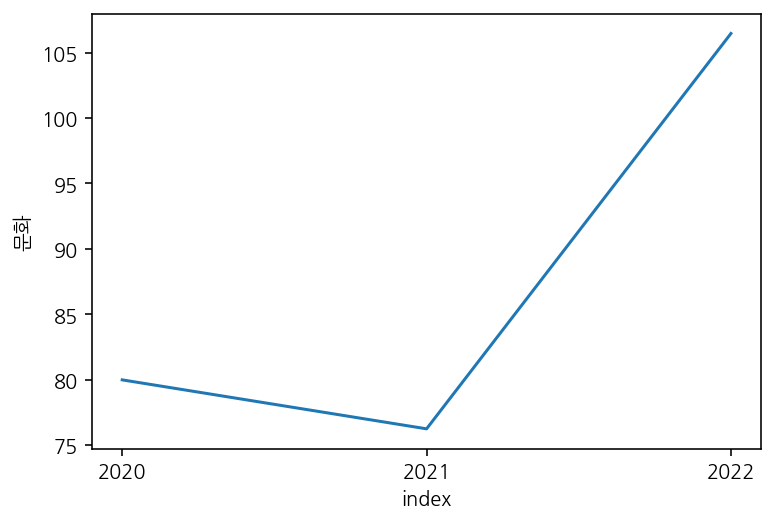

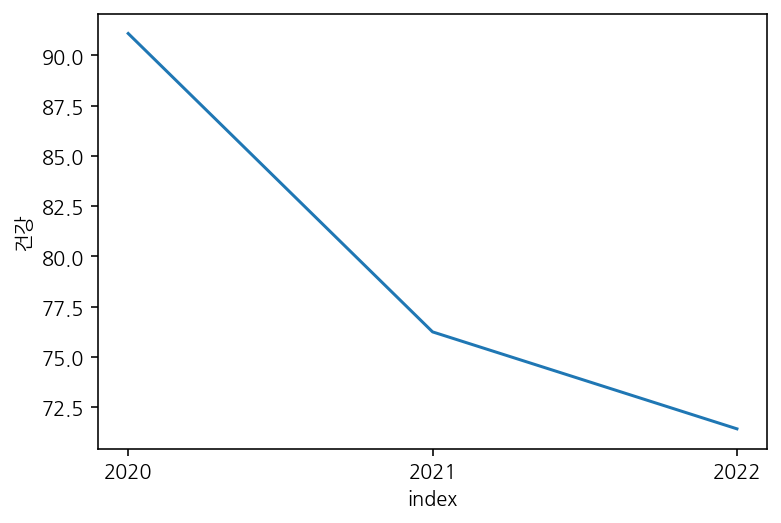

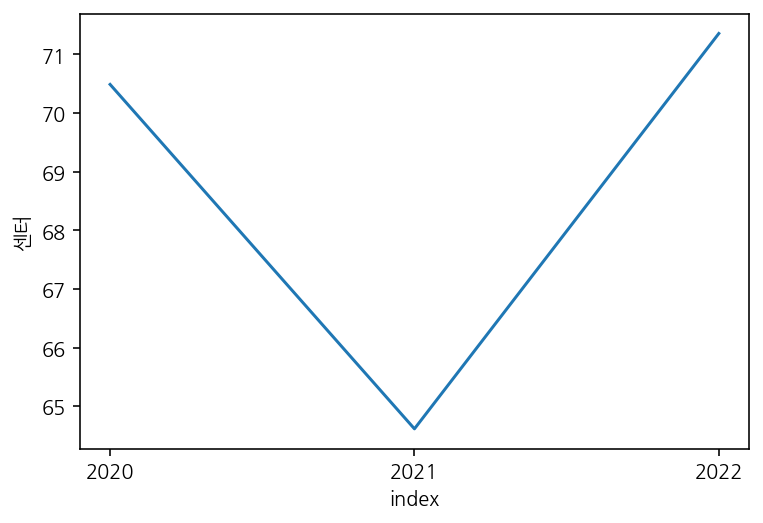

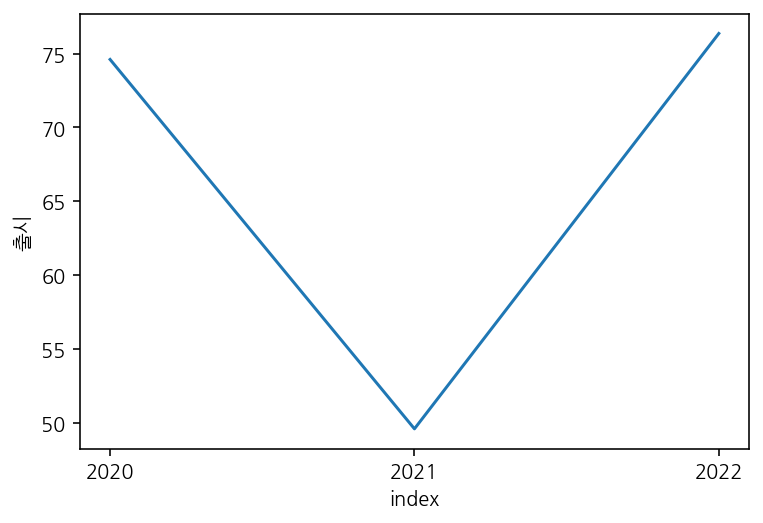

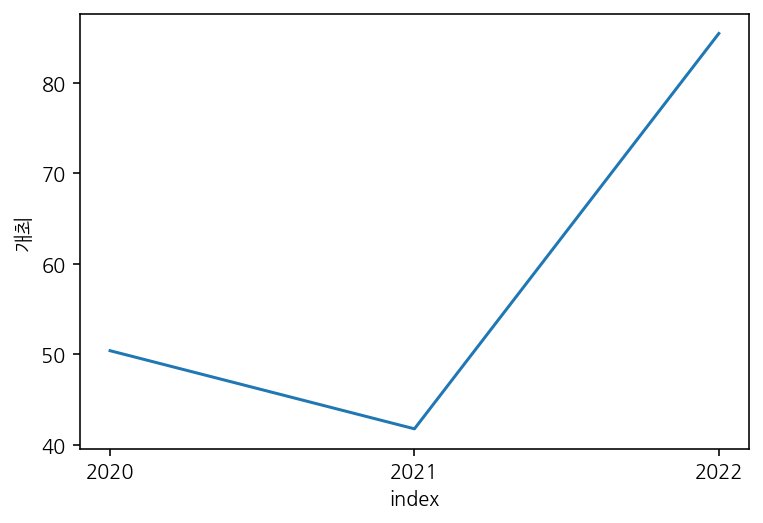

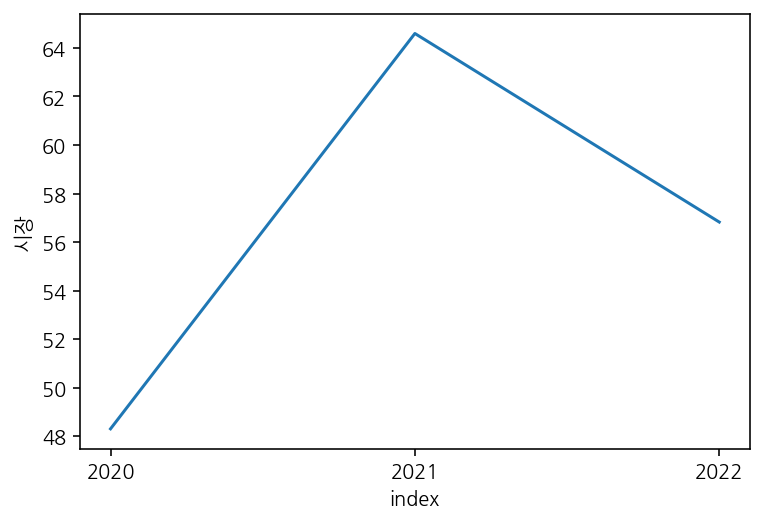

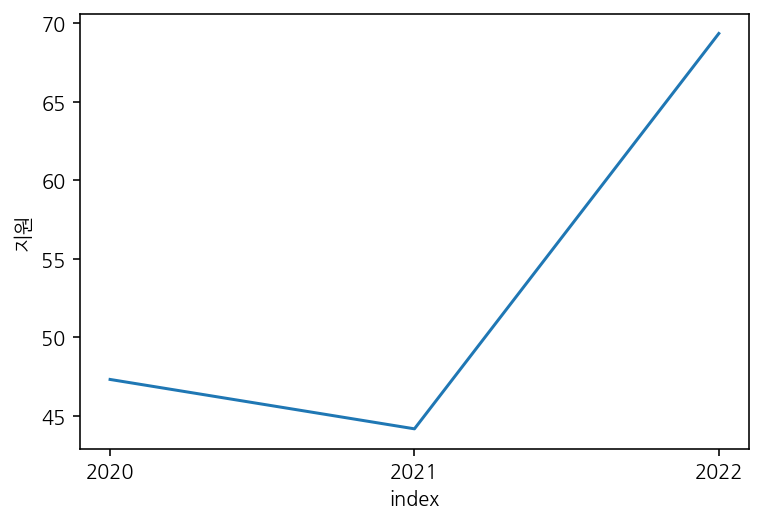

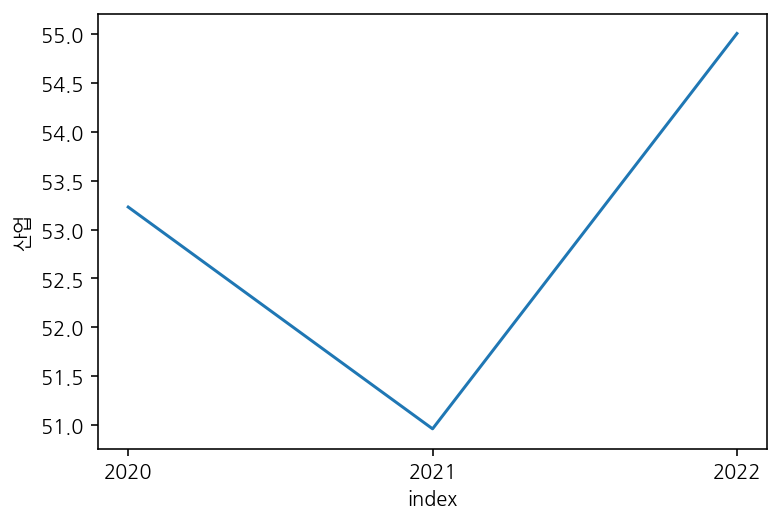

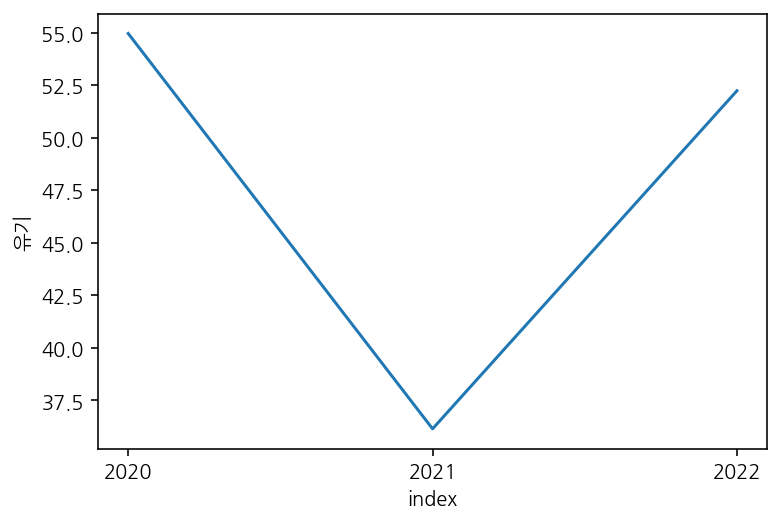

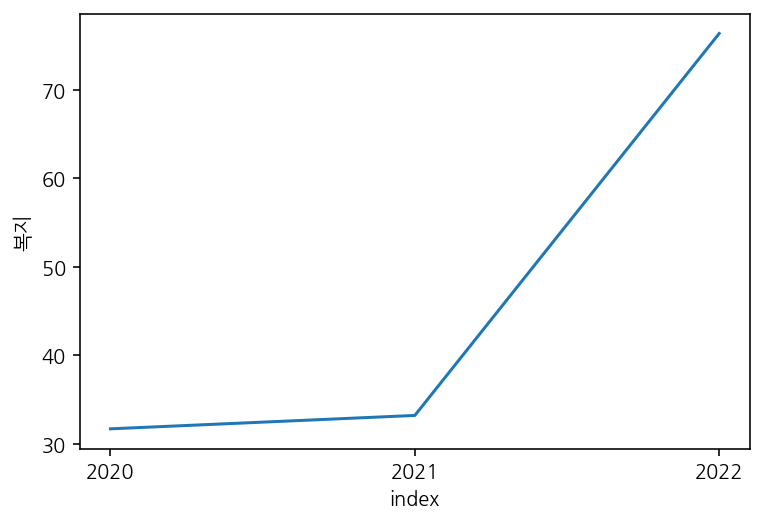

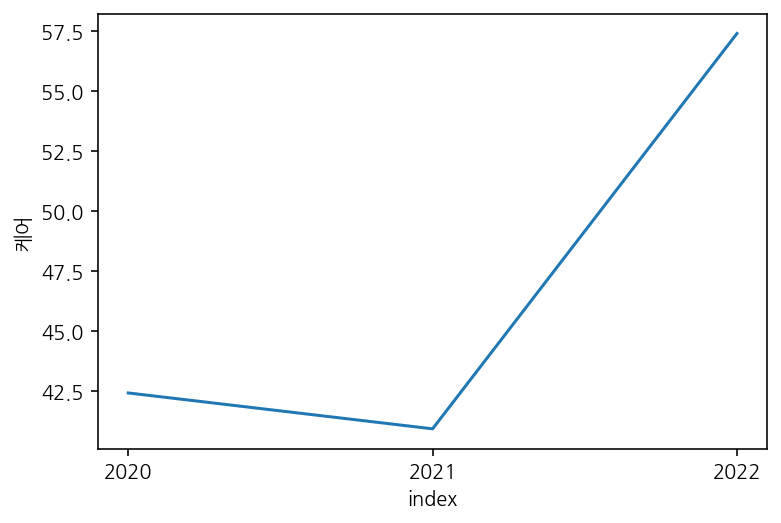

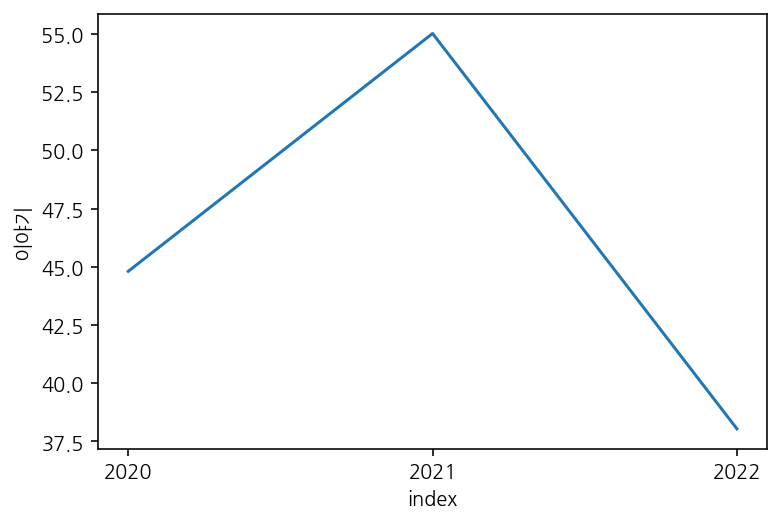

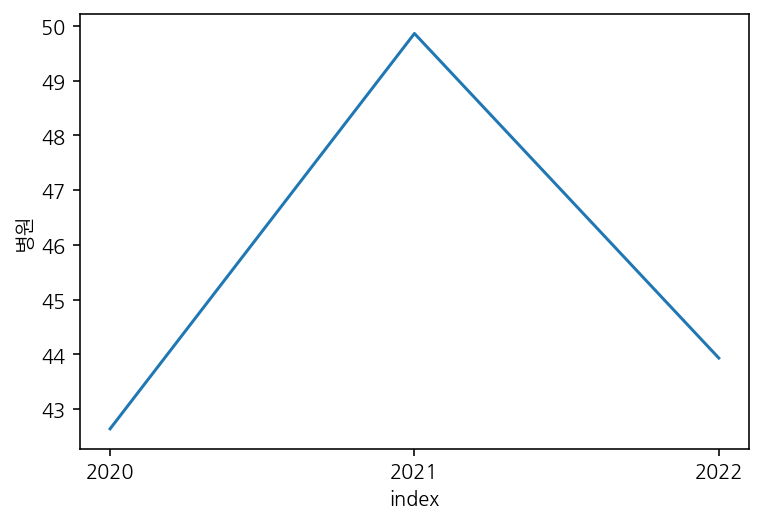

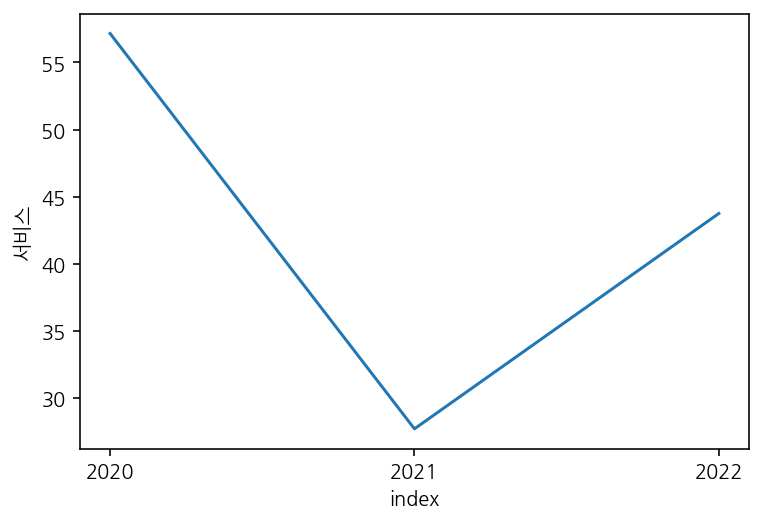

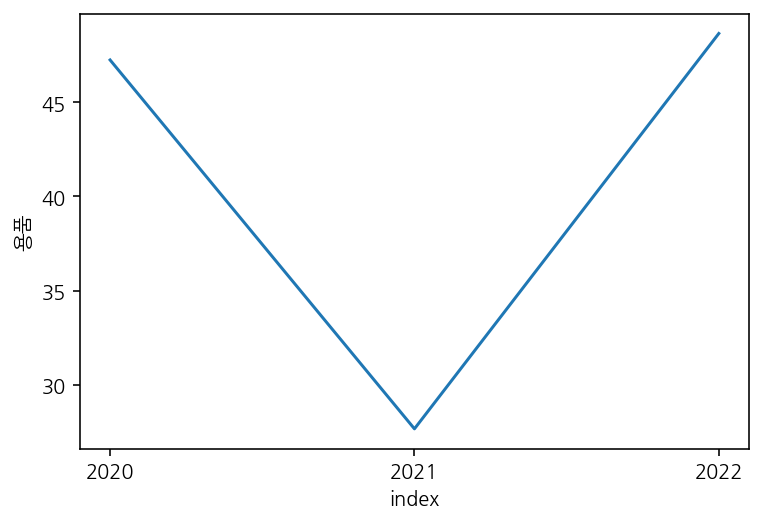

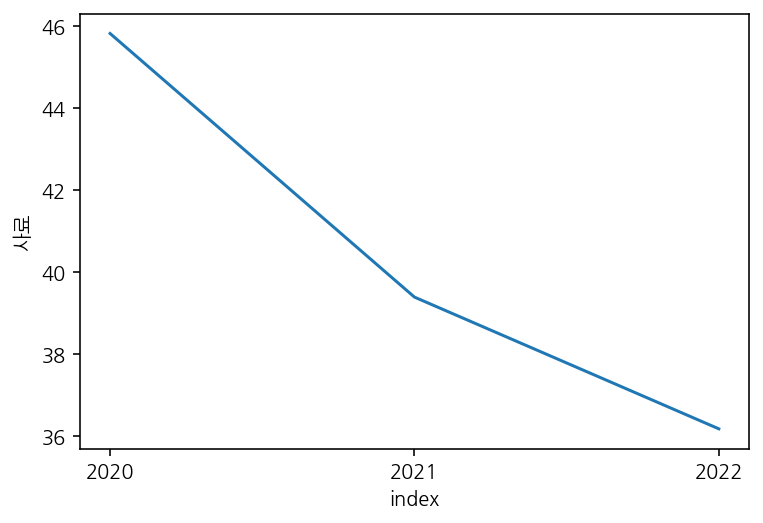

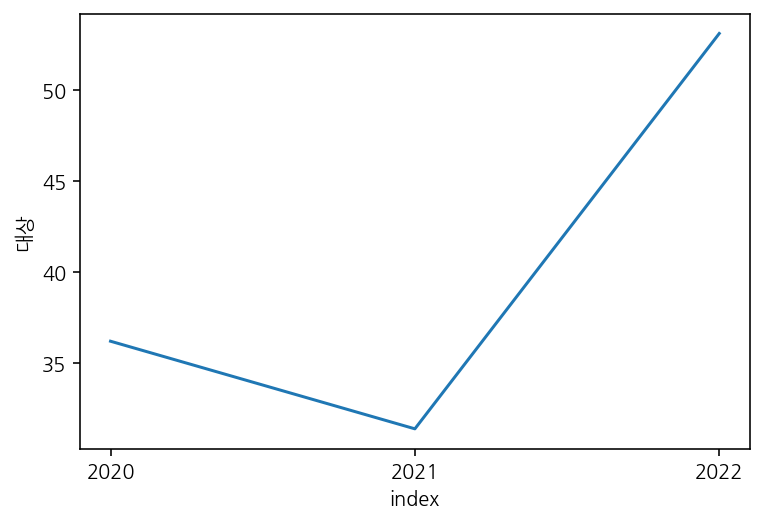

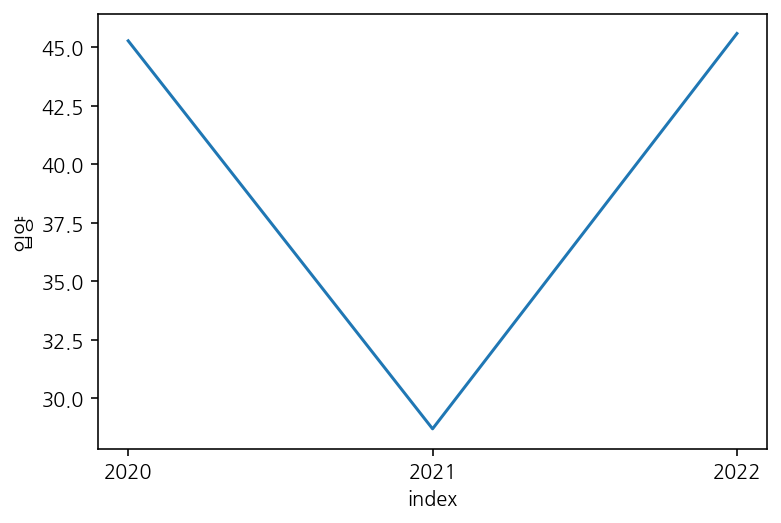

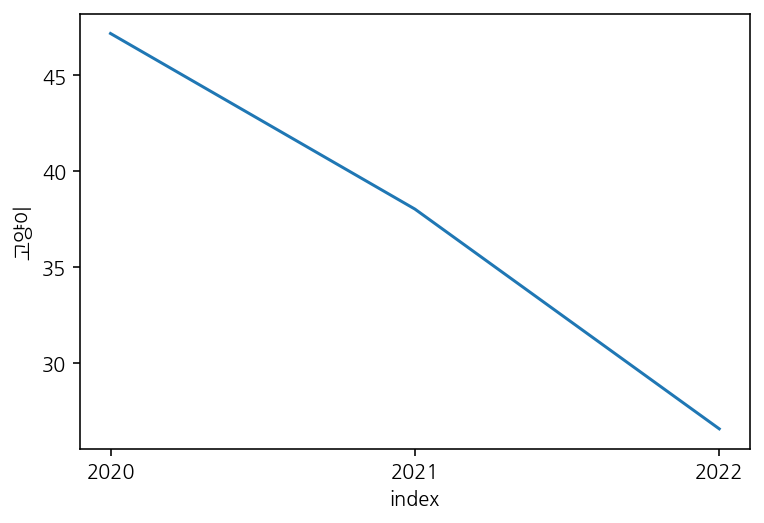

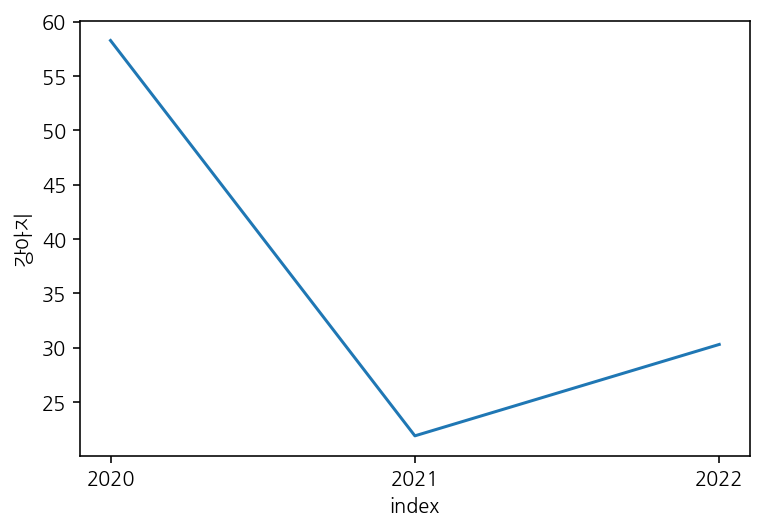

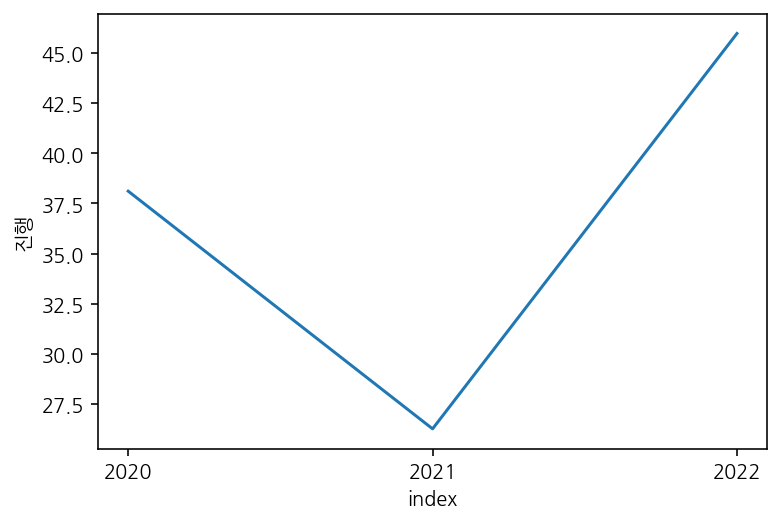

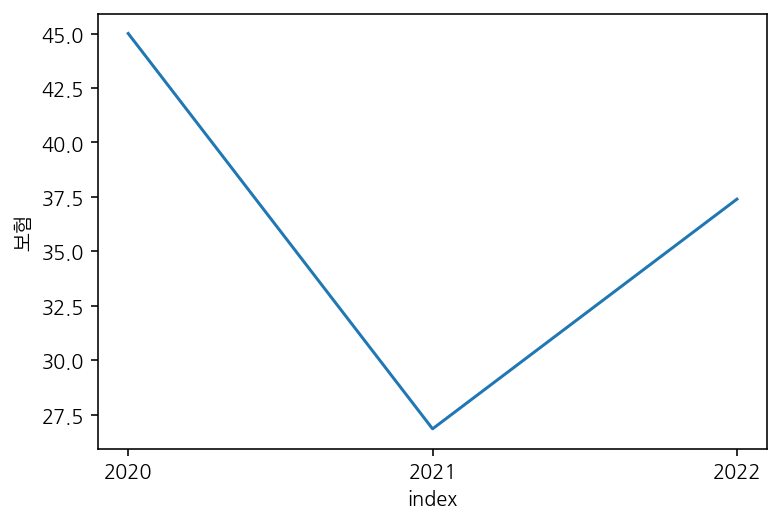

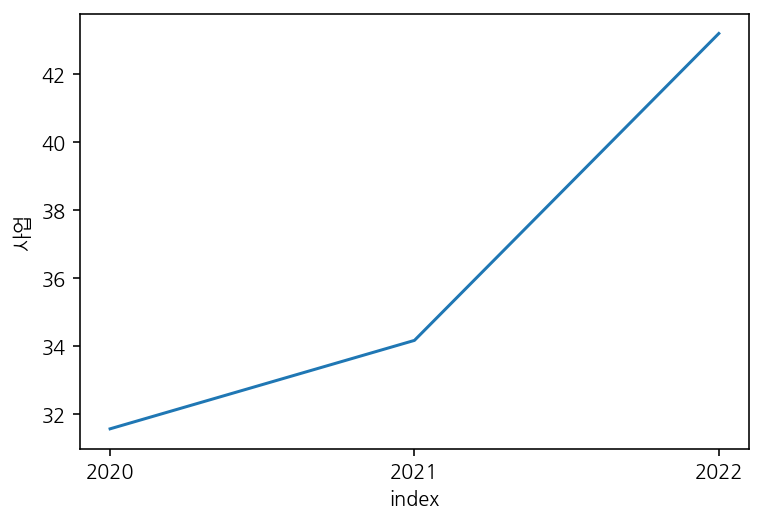

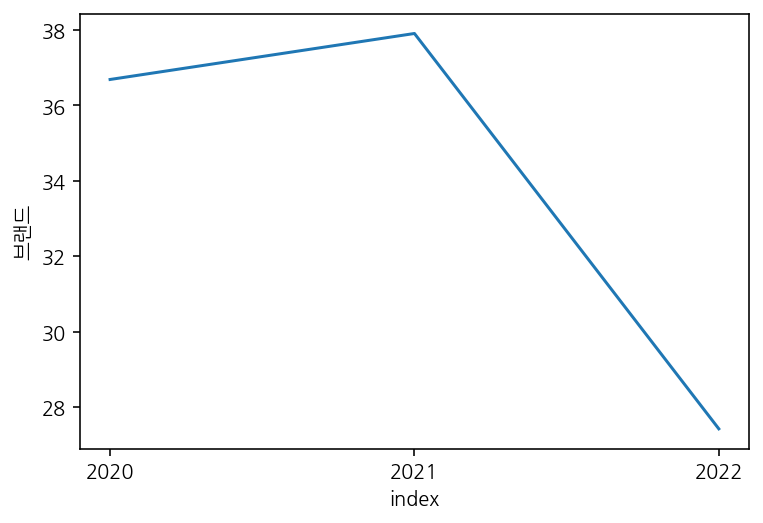

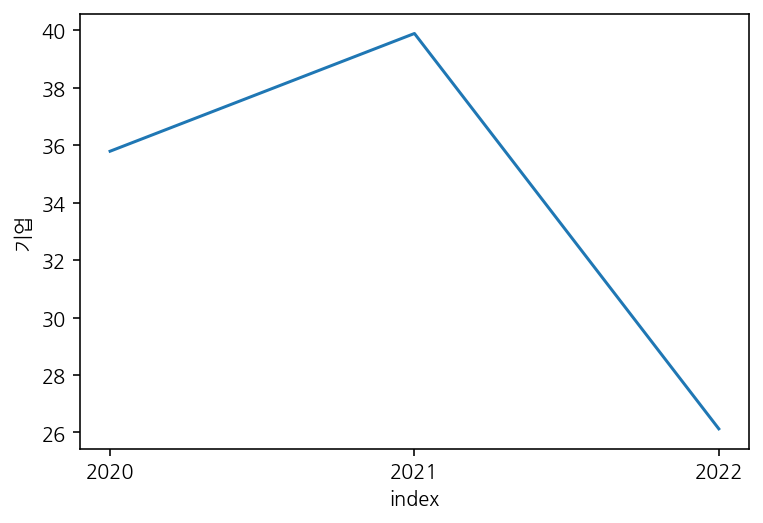

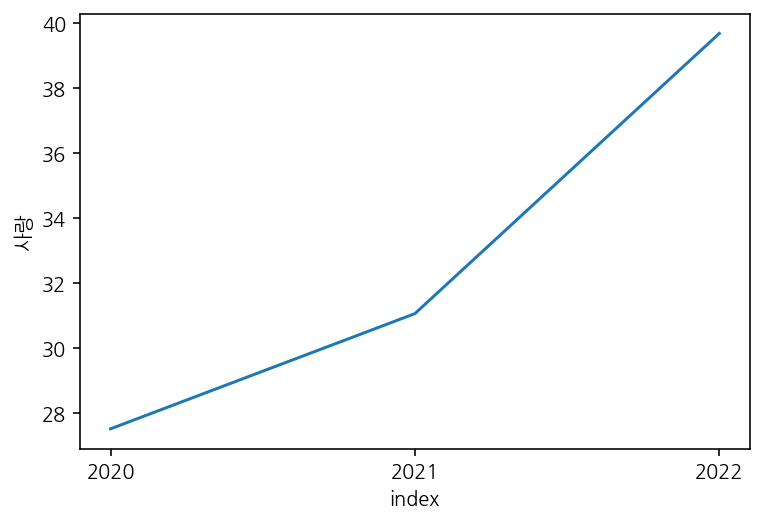

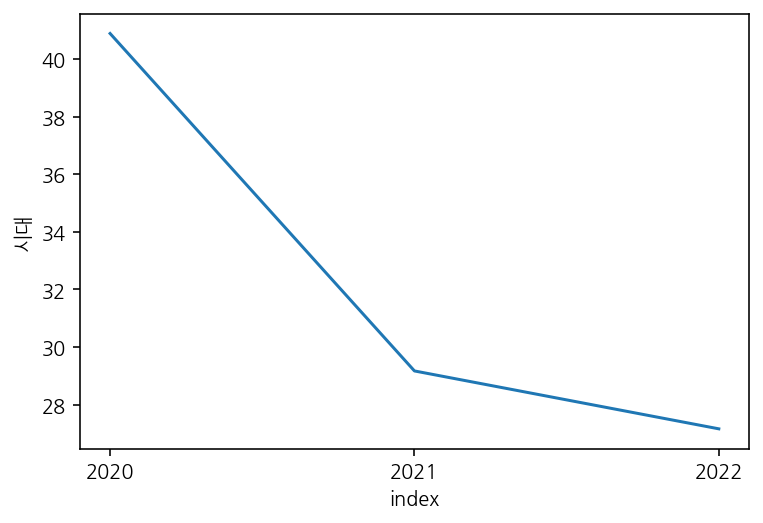

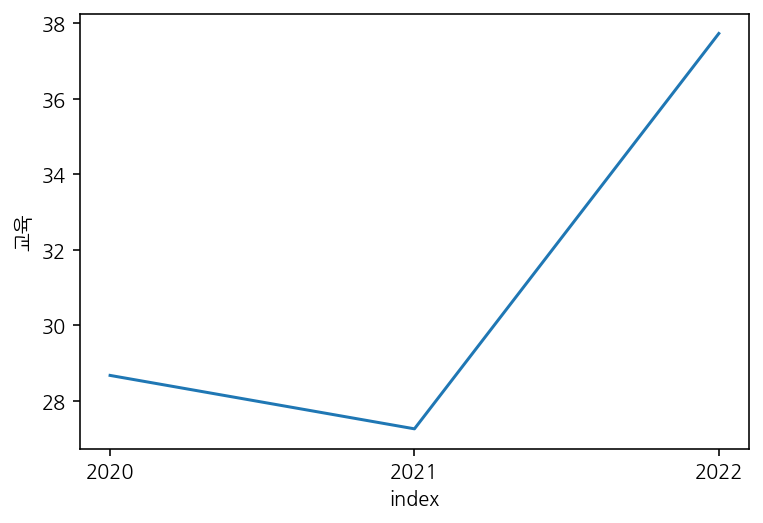

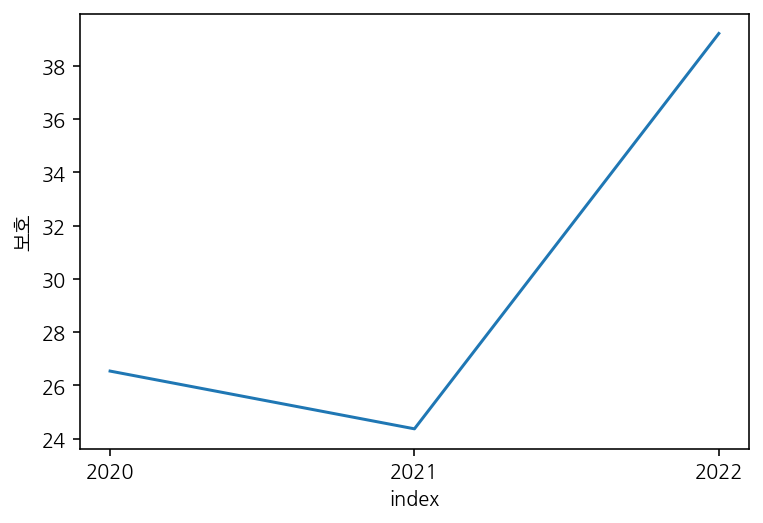

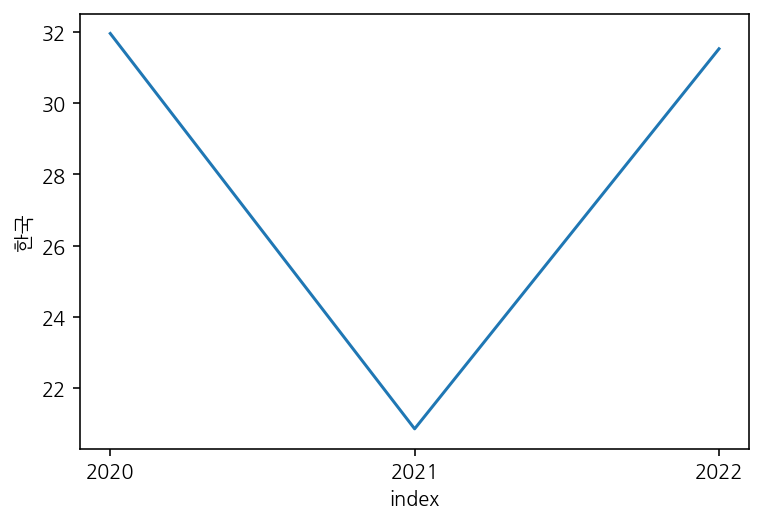

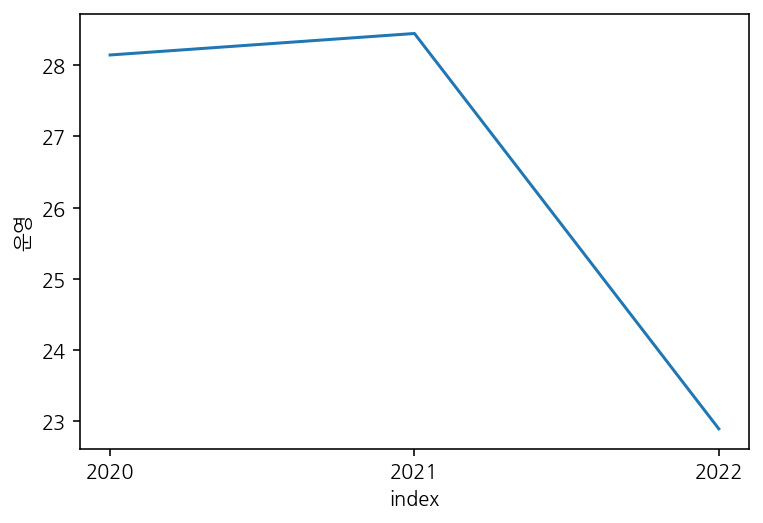

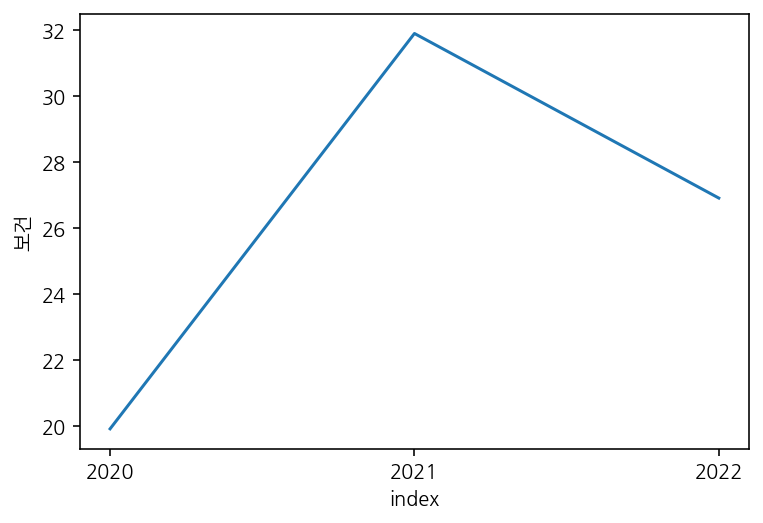

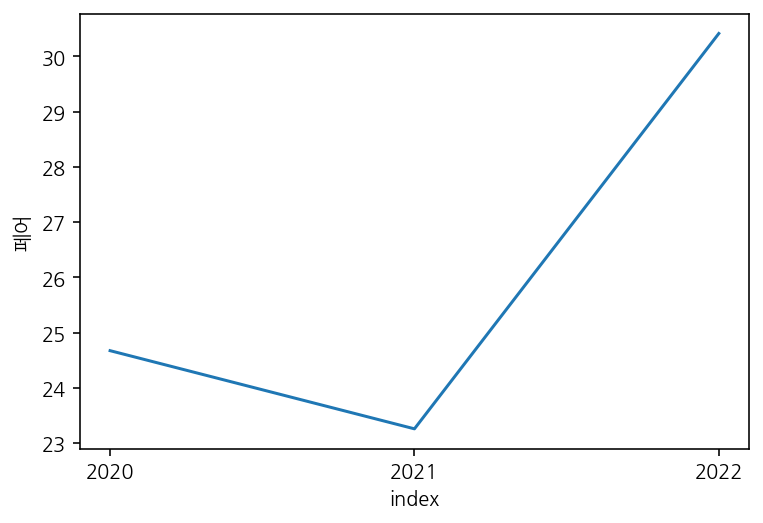

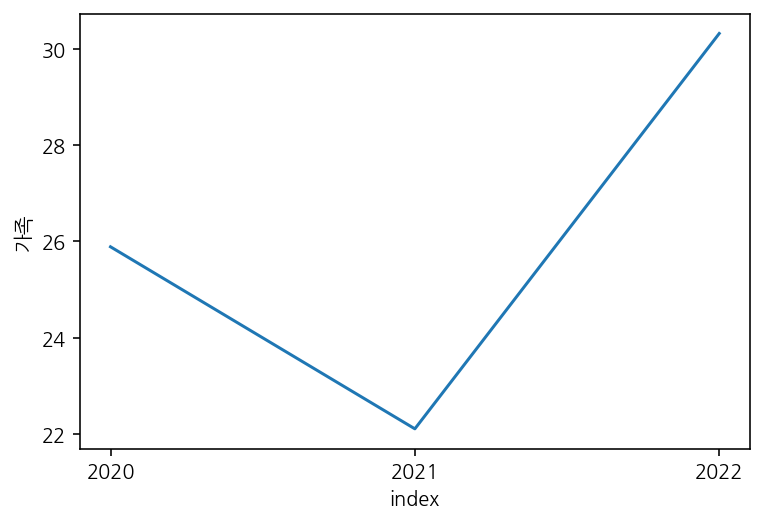

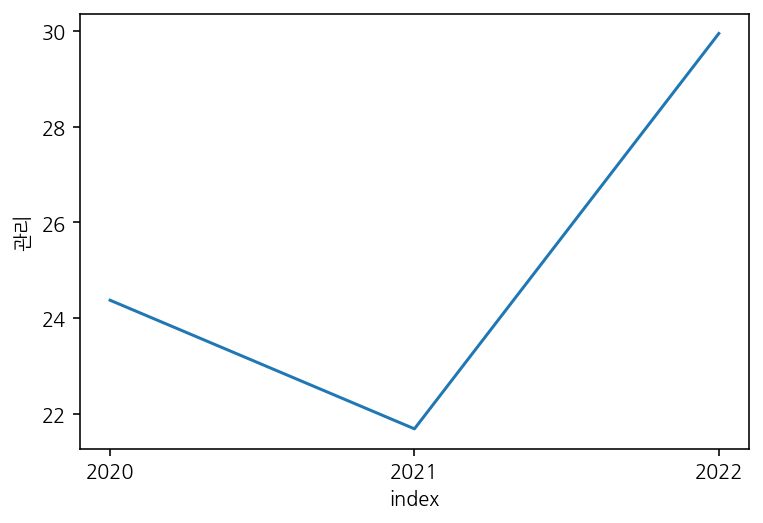

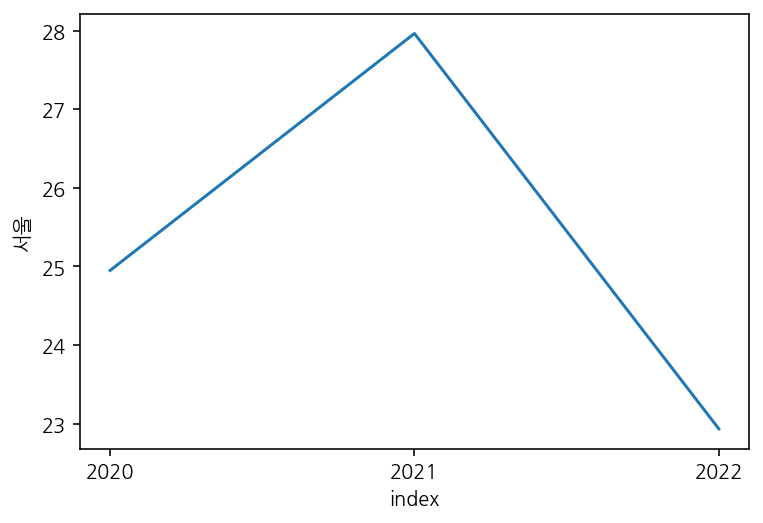

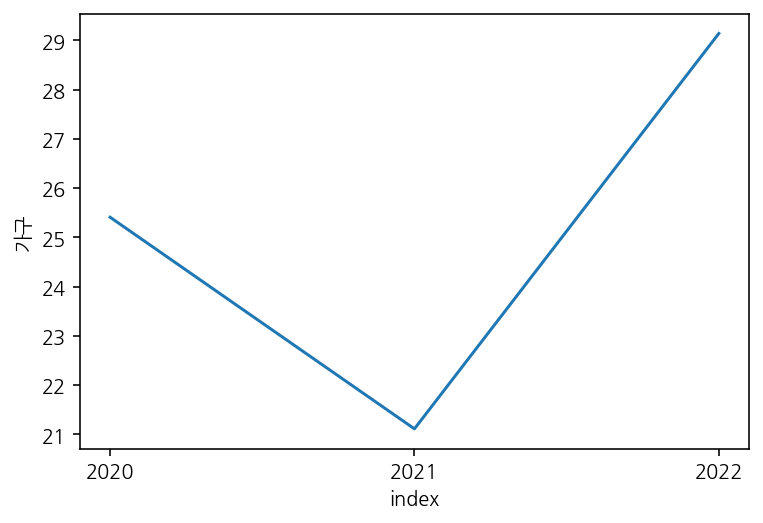

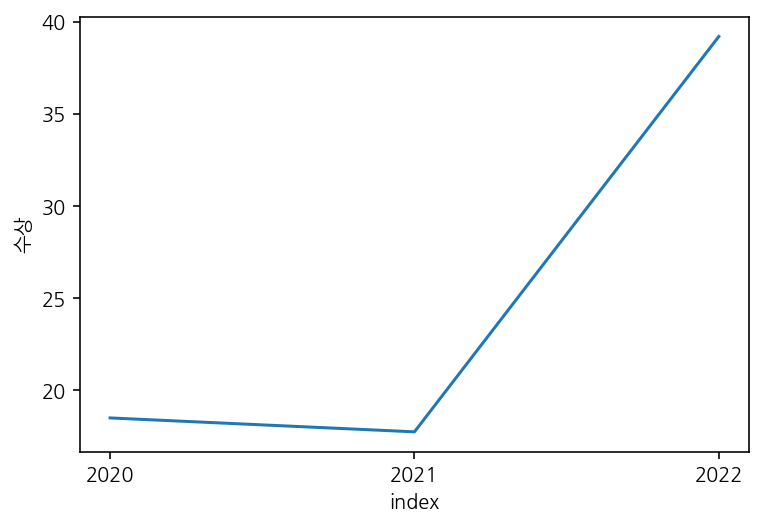

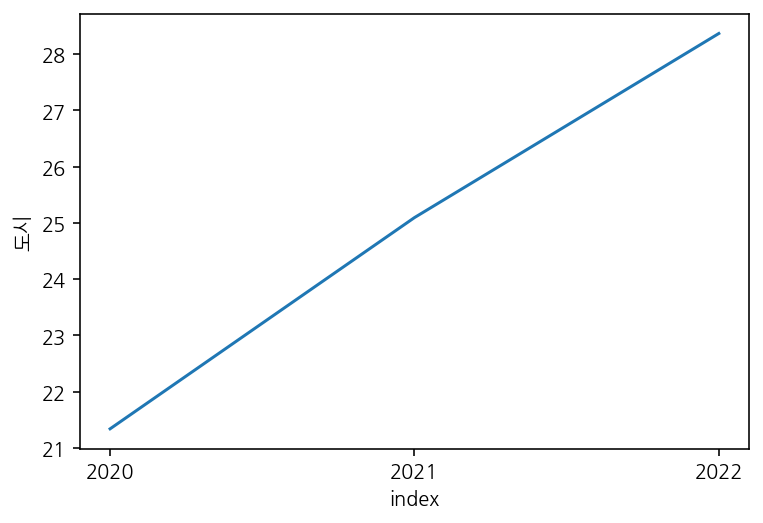

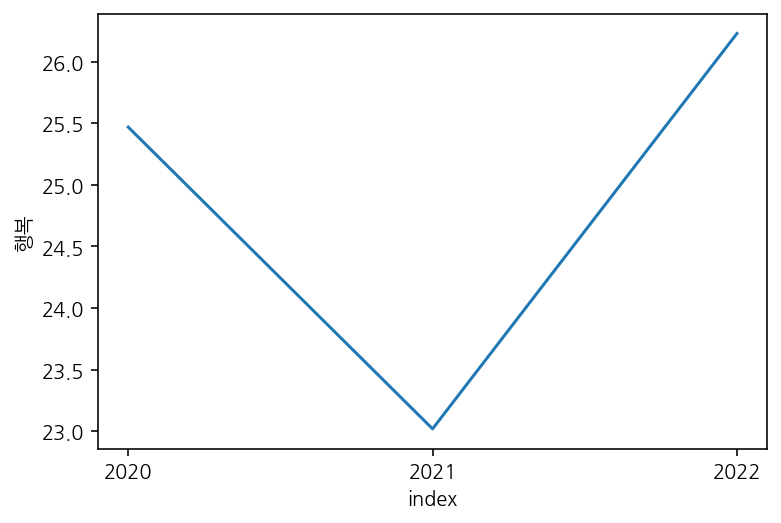

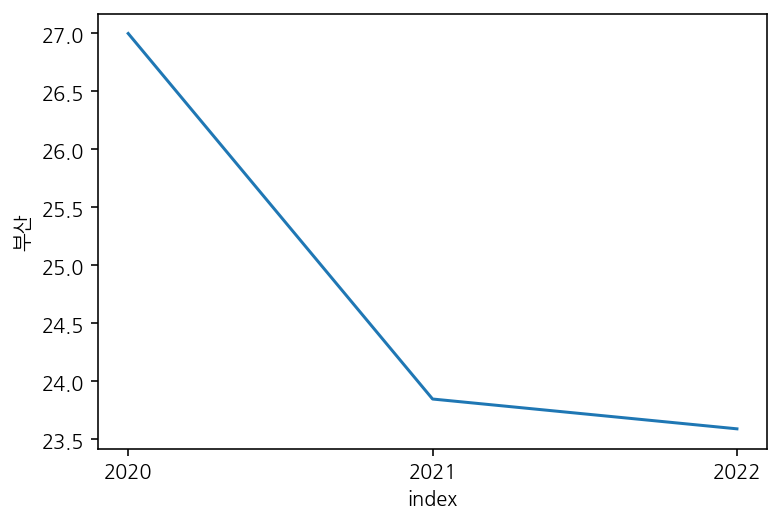

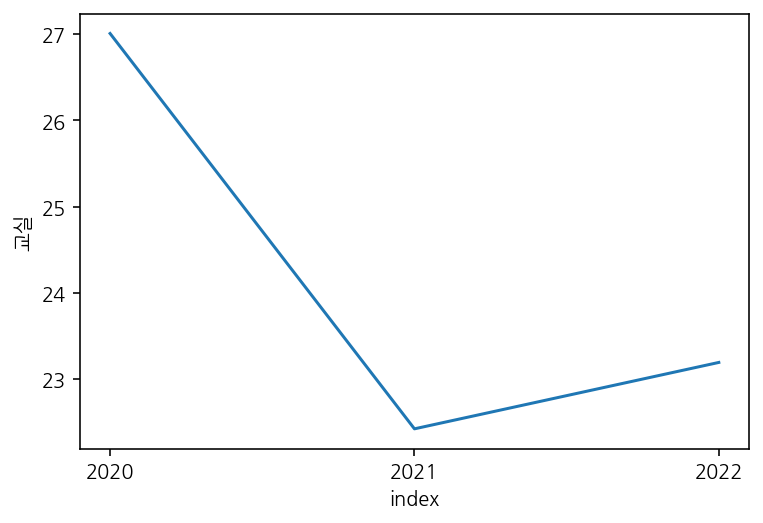

In [ ]:
# 그래프 그리기
for col in cols:
    sns.lineplot(data=newstfidf, x="index", y=col)
    plt.show()

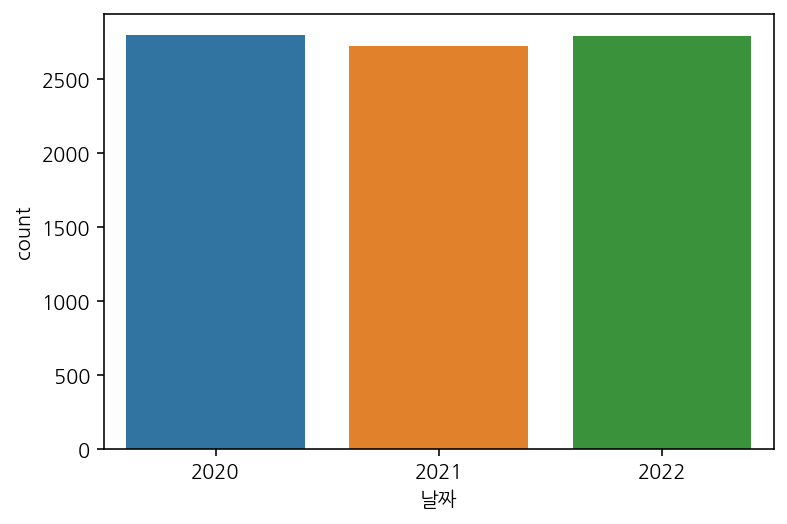

In [ ]:
sns.countplot(data=news, x="날짜");

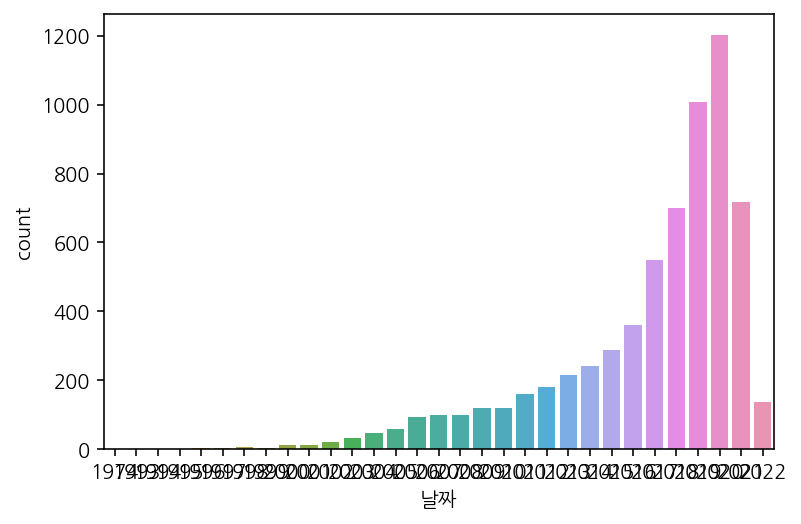

In [ ]:
sns.countplot(data=kipris, x="날짜");

In [ ]:
kipris2020 = tfidf(kipris.loc[kipris["날짜"]==2020, "명사"].values.tolist())
kipris2021 = tfidf(kipris.loc[kipris["날짜"]==2021, "명사"].values.tolist())
kipris2022 = tfidf(kipris.loc[kipris["날짜"]==2022, "명사"].values.tolist())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
kipristfidf = pd.merge(left = kipris2020 , right = pd.merge(left = kipris2021 , right = kipris2022, how = "outer", on = "단어"), how = "outer", on = "단어")
kipristfidf.columns = ['단어','2020','2021','2022']
kipristfidf = kipristfidf.dropna()
kipristfidf

,단어,2020,2021,2022
0,동물,164.521743,95.370531,16.171341
1,반려,154.911926,90.613246,15.329328
2,방법,116.797577,72.535494,13.715395
3,장치,82.203726,52.084908,11.498194
4,시스템,79.165039,51.513935,11.296442
5,조성물,66.722537,37.348998,8.320052
6,제조,60.478536,37.129566,6.722831
7,이용,50.865369,29.865148,6.825750
8,치료,45.616044,26.815908,3.120682
9,포함,41.430734,29.323152,5.845281


In [ ]:
kipristfidf["총합"] = kipristfidf.sum(axis=1)
kipristfidf = kipristfidf.sort_values('총합', ascending=False)

pd.set_option('display.max_columns', None)

# 앞에 두개는 반려, 동물이라서 뺐습니다
kipristfidf = kipristfidf[2:].drop(columns="총합")
kipristfidf.set_index(keys=["단어"], inplace=True, drop=True)
kipristfidf = kipristfidf.T.reset_index()
kipristfidf

<ipython-input-28-019567f052e1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kipristfidf["총합"] = kipristfidf.sum(axis=1)


단어,index,방법,장치,시스템,조성물,제조,이용,포함,치료,제공,관리,사료,애완,서비스,기반,용도,사용,기능,배변,예방,정보,질환,간식,스마트,개선,가능,고양이,처리,성분,진단,케어,플랫,추출물,건강,맞춤,조절,측정,항체,분석,인공지능,패드,서버,유효,프로그램,데이터,추천,피부,염증,모니터링,센서,위치
0,2020,116.797577,82.203726,79.165039,66.722537,60.478536,50.865369,41.430734,45.616044,38.499328,37.724994,39.553337,31.097650,29.832098,30.907892,36.002440,33.563132,23.186154,20.174357,20.057079,22.197113,21.389992,22.472275,17.730845,14.631551,18.568510,13.965343,15.710095,16.149479,14.160995,12.070845,9.232439,10.315535,13.782148,14.536366,12.910535,10.417145,12.975671,11.831884,9.886715,10.408180,8.921647,10.198587,5.964042,5.900312,7.030659,8.526210,8.002555,6.273353,6.502395,6.650336
1,2021,72.535494,52.084908,51.513935,37.348998,37.129566,29.865148,29.323152,26.815908,23.134139,20.080501,16.058715,23.473408,20.091159,18.122190,13.784855,13.440098,18.950785,15.576322,14.133540,11.904184,11.907271,8.732373,11.321823,13.216315,7.874416,11.172877,9.548540,7.602385,9.686067,11.791187,11.150315,11.511557,4.932192,7.071514,7.686633,9.023586,5.347989,6.513980,7.811407,7.743917,6.046400,5.938780,8.633179,8.891286,6.689947,5.529176,4.531934,4.926531,4.192122,3.491572
2,2022,13.715395,11.498194,11.296442,8.320052,6.722831,6.825750,5.845281,3.120682,8.796920,4.415357,3.246757,2.369854,6.164188,4.691500,3.398032,2.690609,3.034897,3.811914,3.597940,2.255493,1.447402,3.327236,2.795819,3.693514,3.116393,2.179720,1.398524,1.510613,1.370789,0.976907,3.071229,1.379442,4.216189,1.193401,1.006664,1.672508,1.792004,1.451228,2.064964,1.272518,3.014819,1.113581,2.623324,2.336013,1.625911,1.125426,0.900451,1.768784,1.301791,1.182851


In [ ]:
cols = kipristfidf.columns[1:]
cols

Index(['방법', '장치', '시스템', '조성물', '제조', '이용', '포함', '치료', '제공', '관리', '사료',
       '애완', '서비스', '기반', '용도', '사용', '기능', '배변', '예방', '정보', '질환', '간식',
       '스마트', '개선', '가능', '고양이', '처리', '성분', '진단', '케어', '플랫', '추출물', '건강',
       '맞춤', '조절', '측정', '항체', '분석', '인공지능', '패드', '서버', '유효', '프로그램', '데이터',
       '추천', '피부', '염증', '모니터링', '센서', '위치'],
      dtype='object', name='단어')

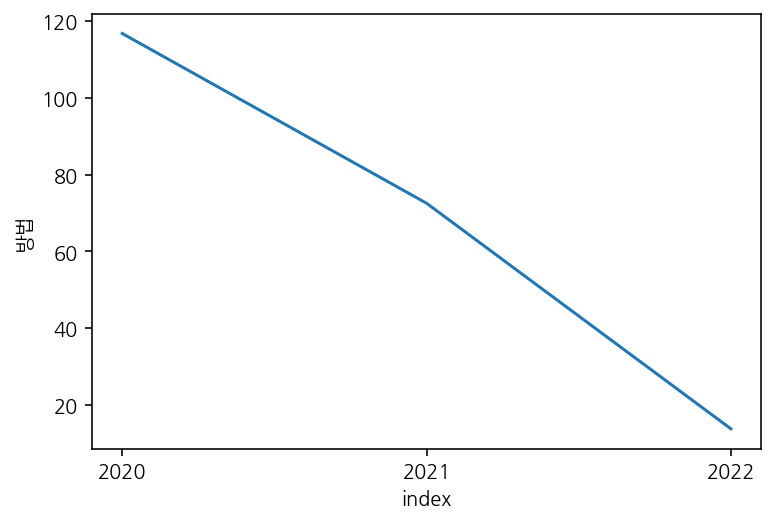

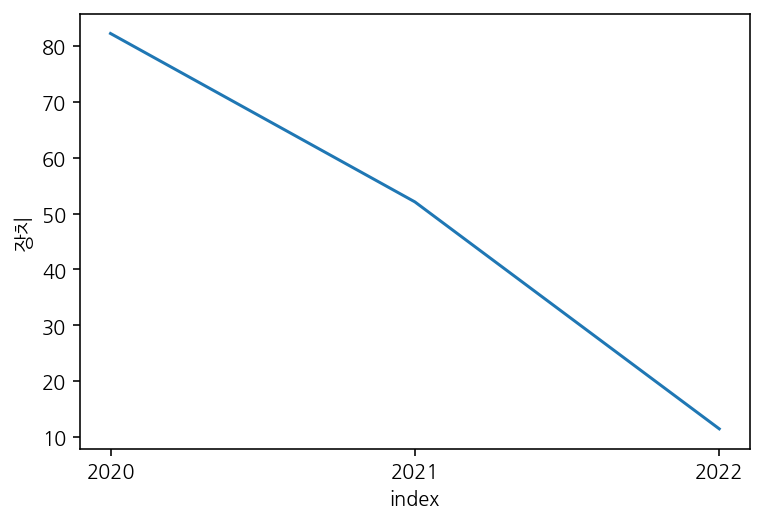

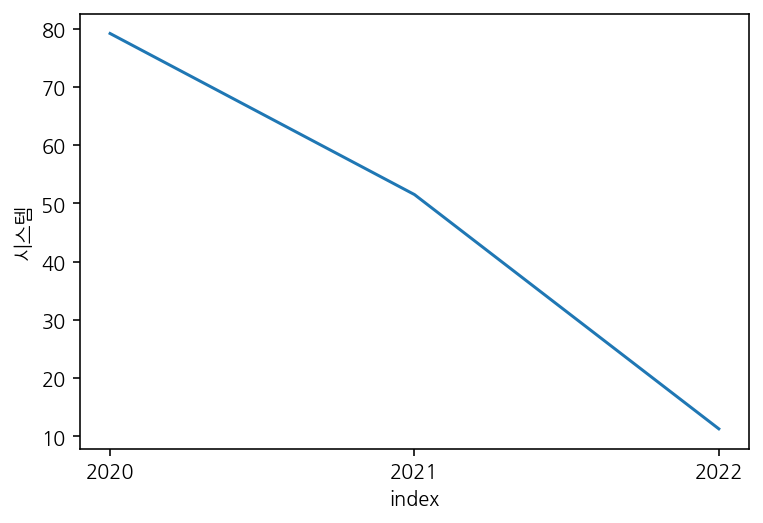

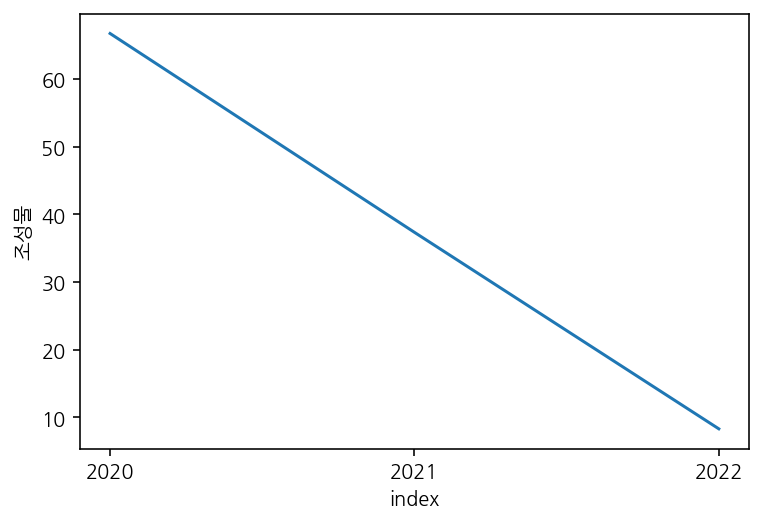

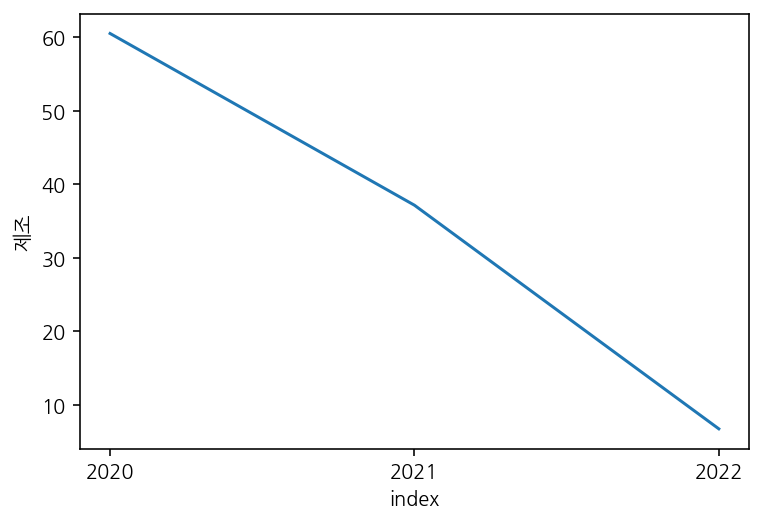

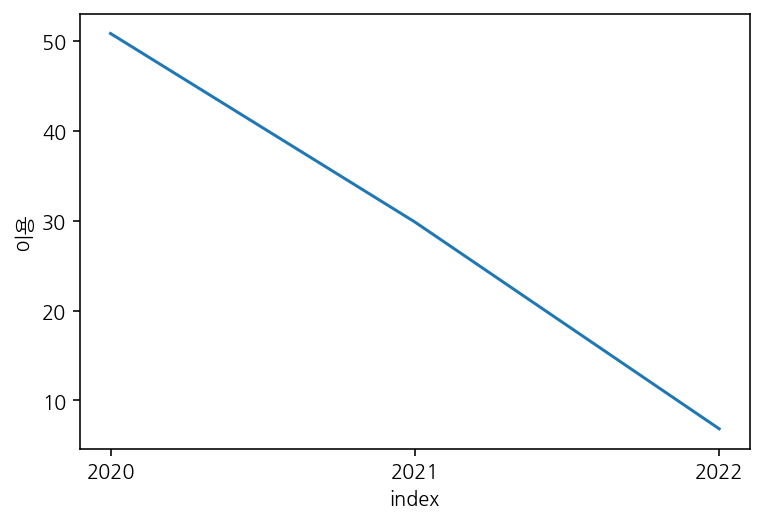

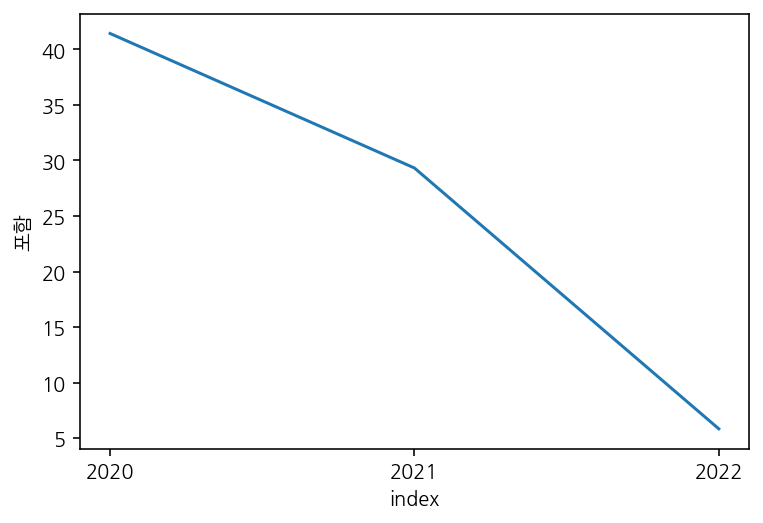

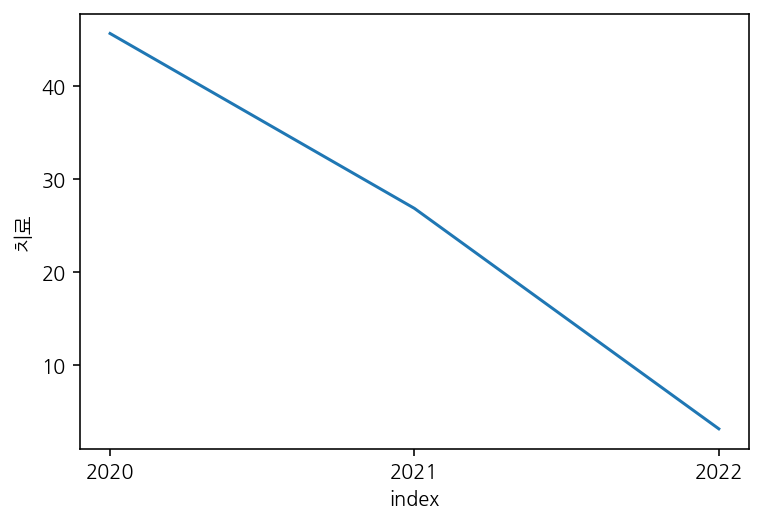

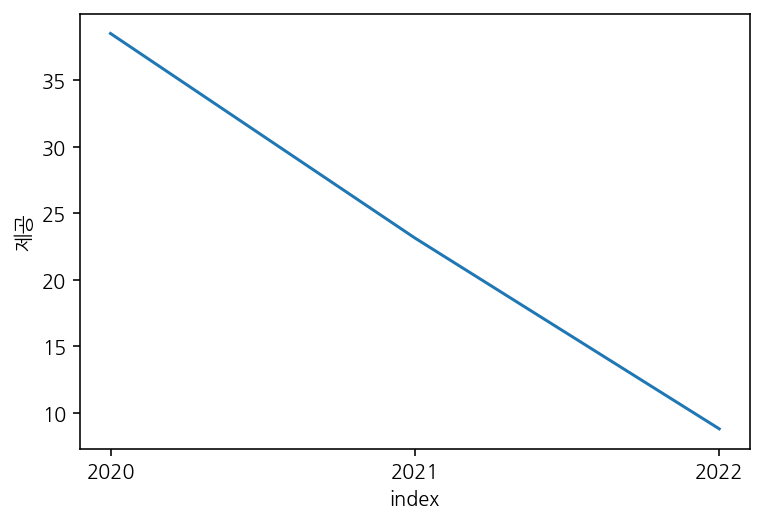

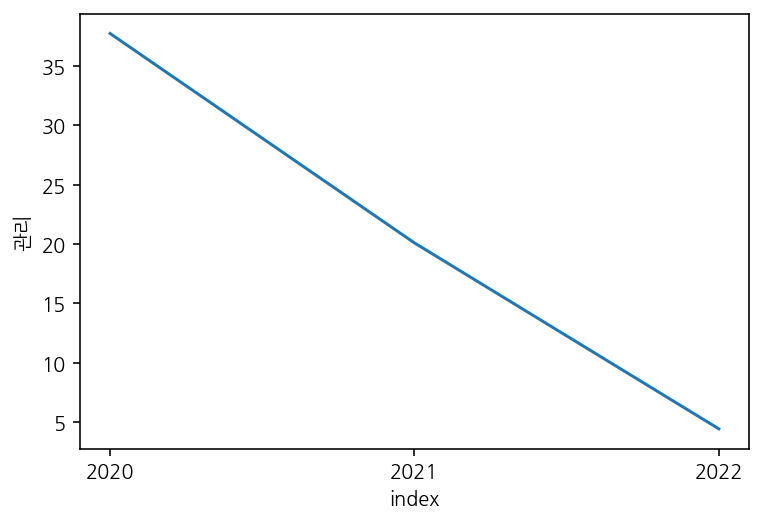

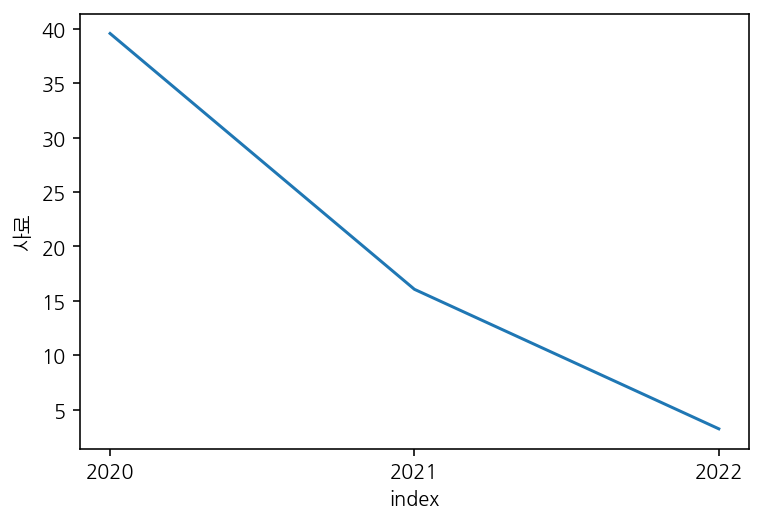

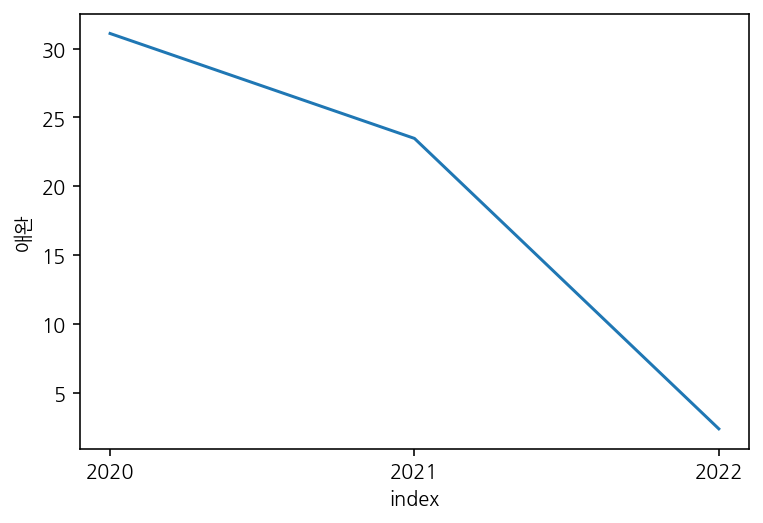

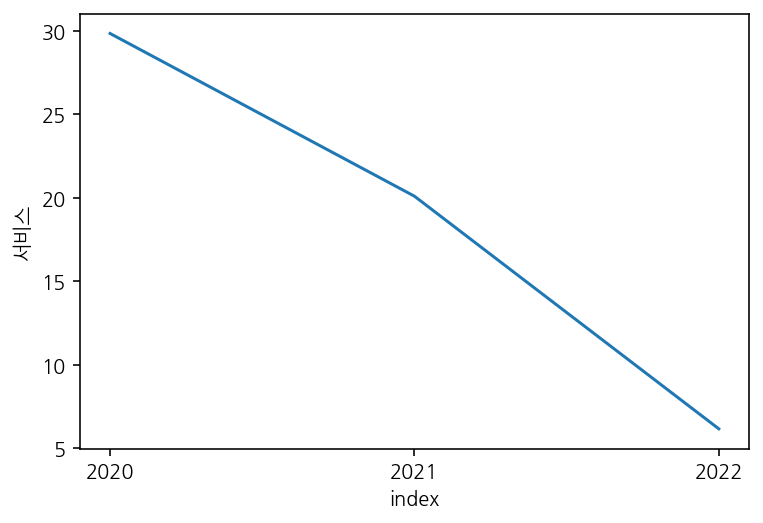

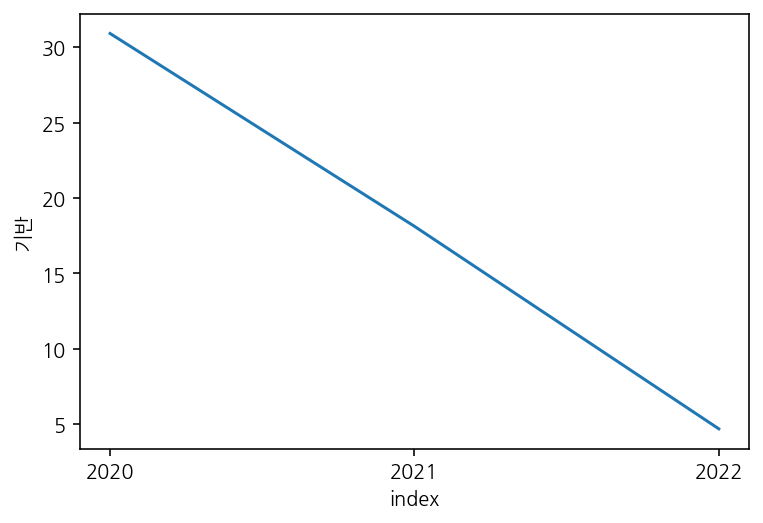

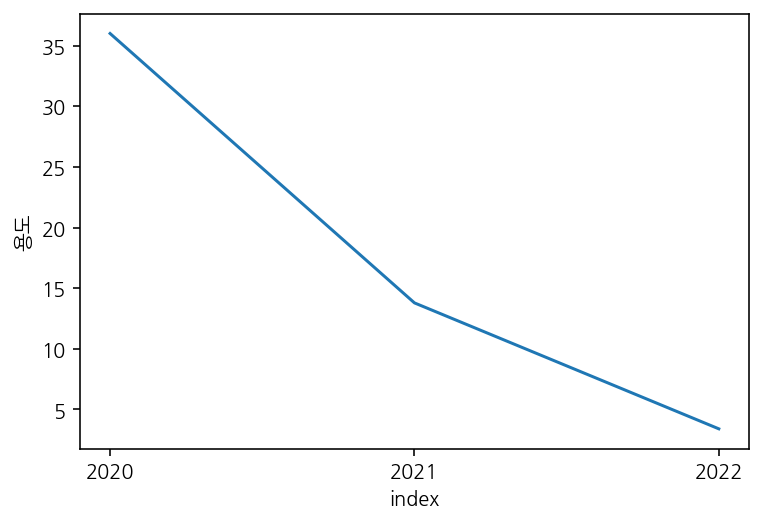

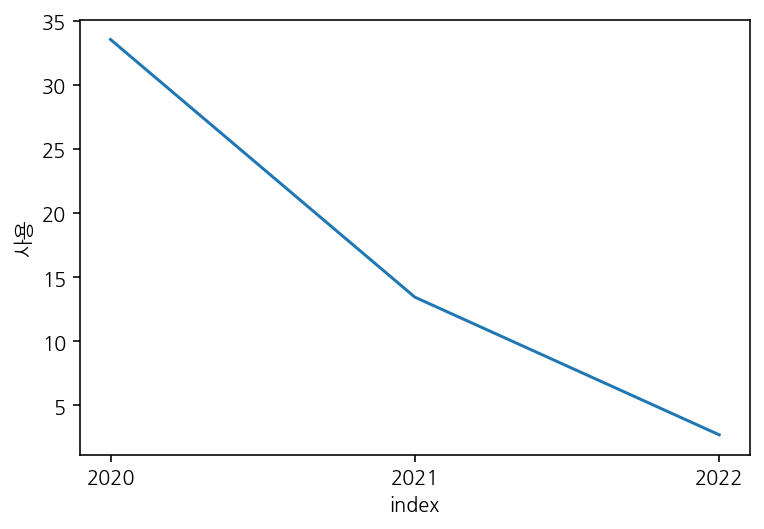

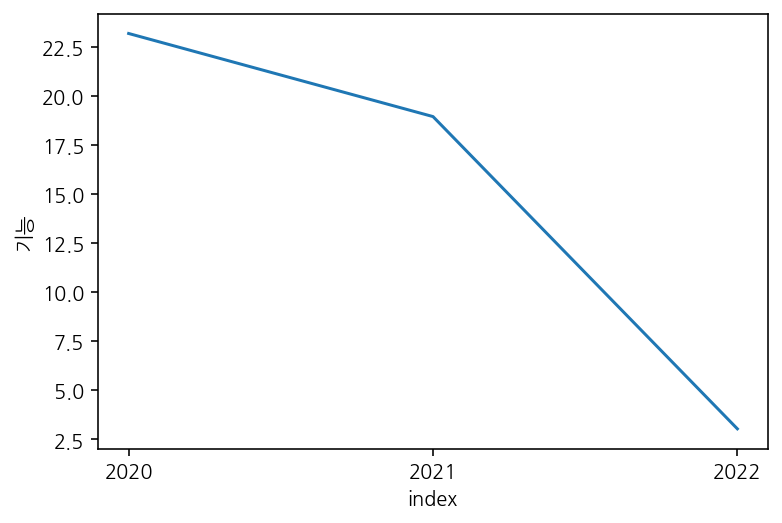

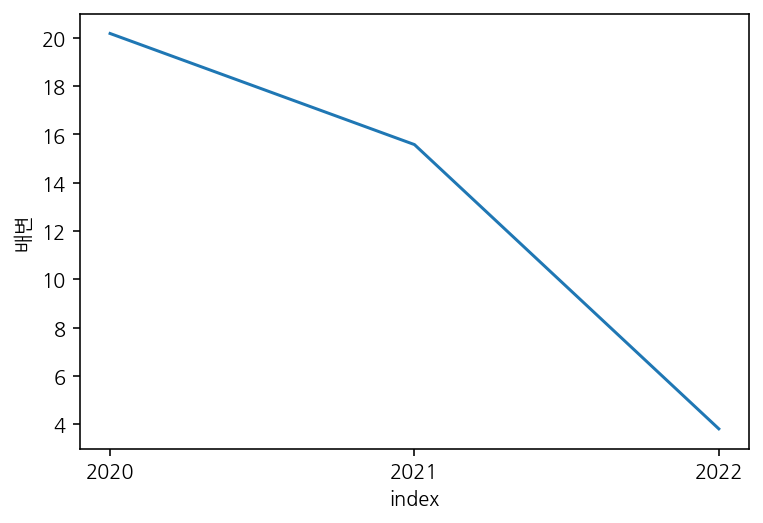

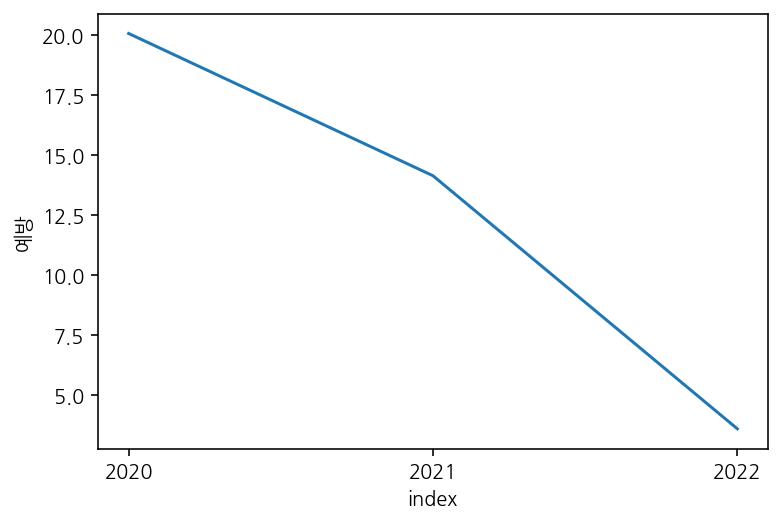

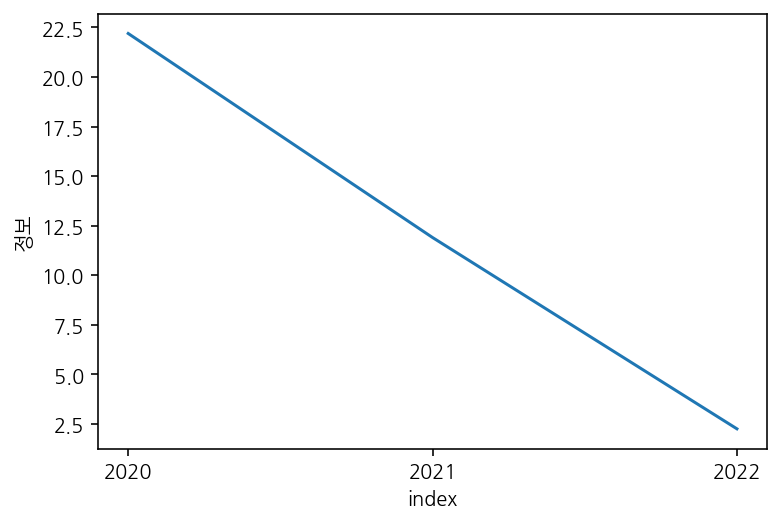

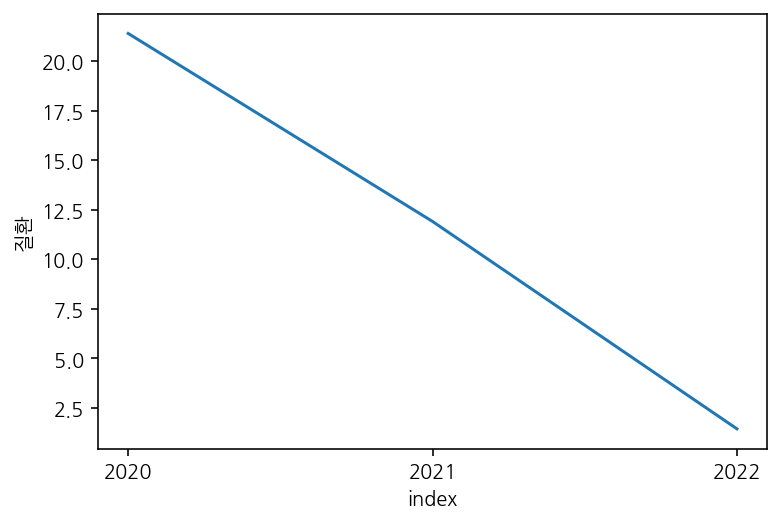

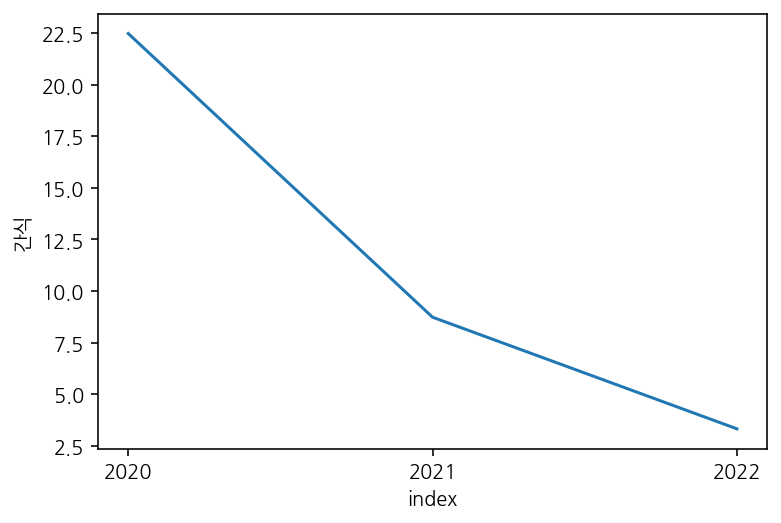

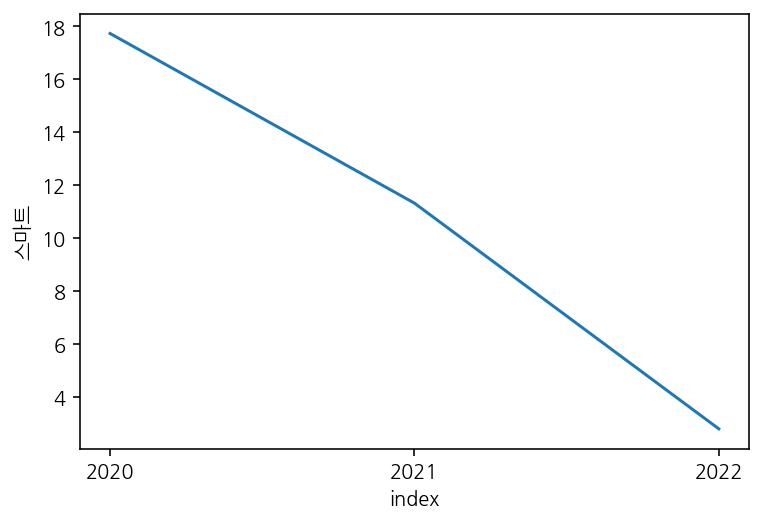

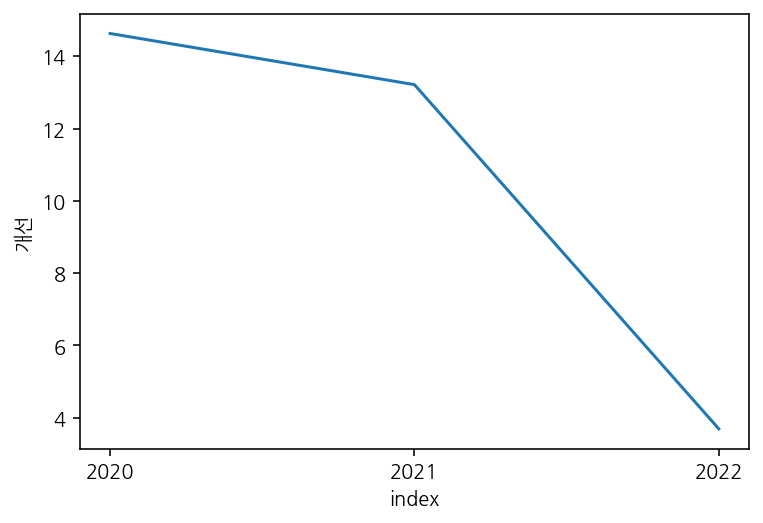

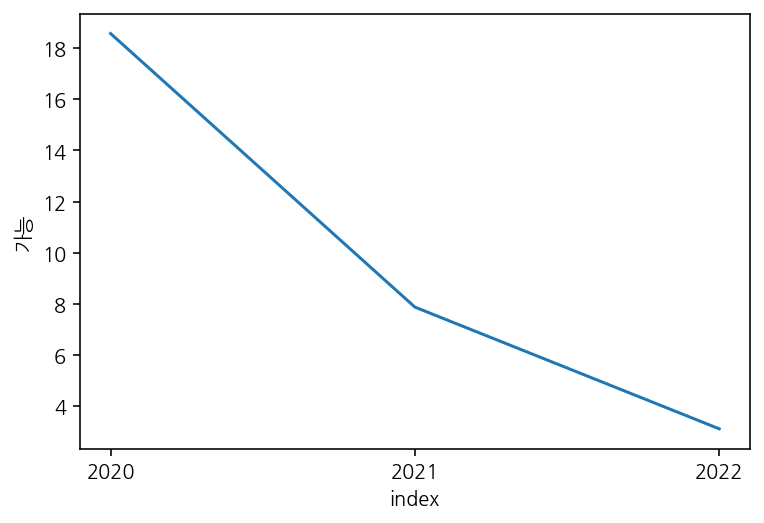

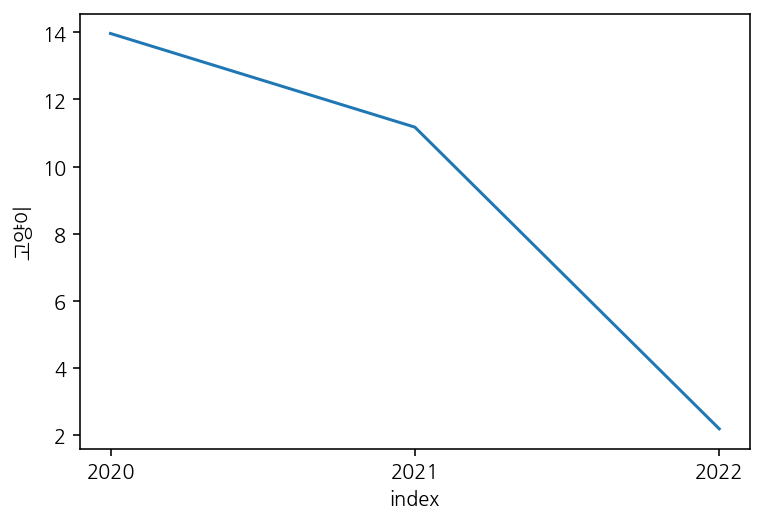

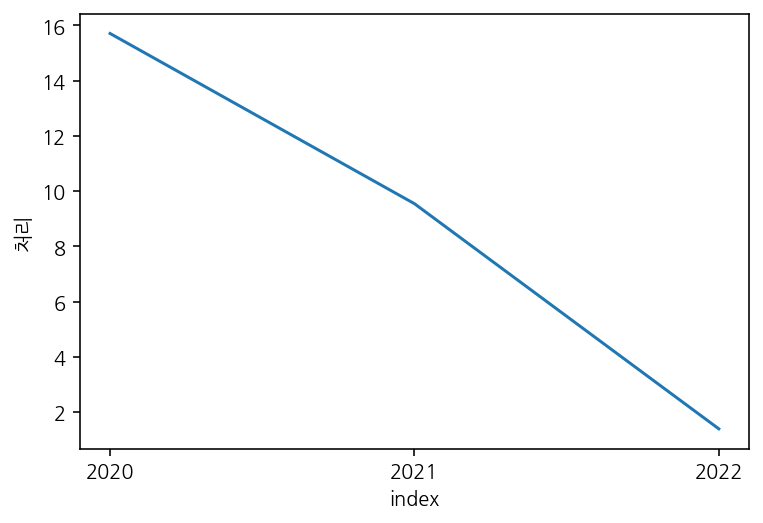

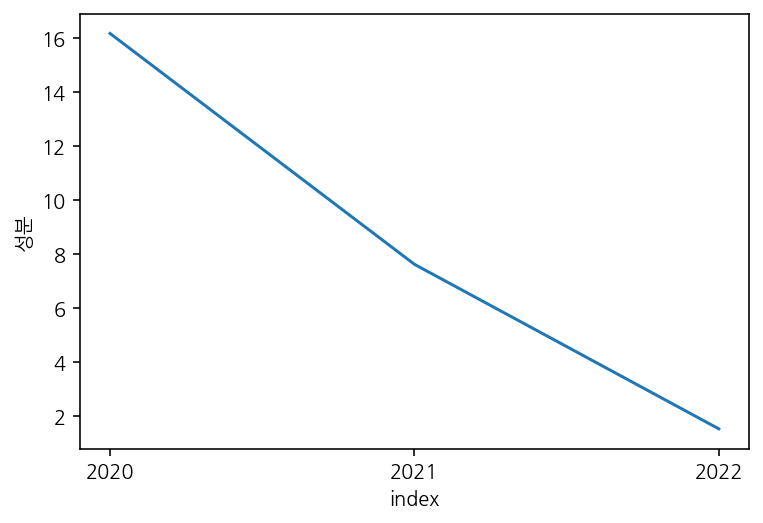

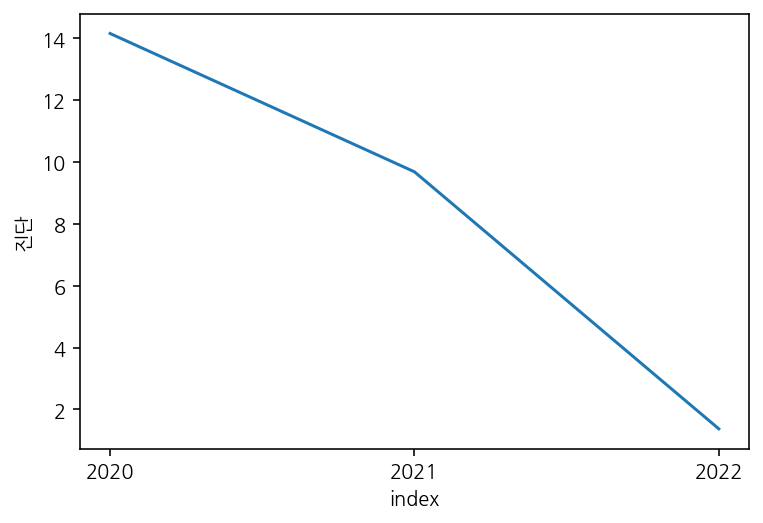

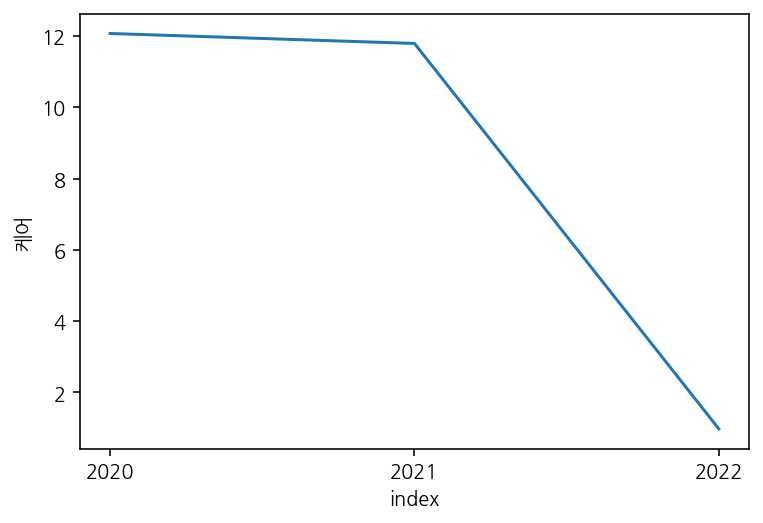

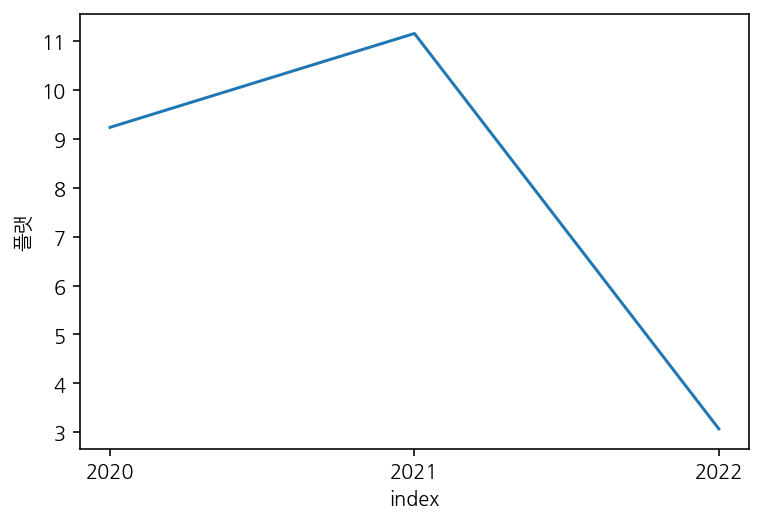

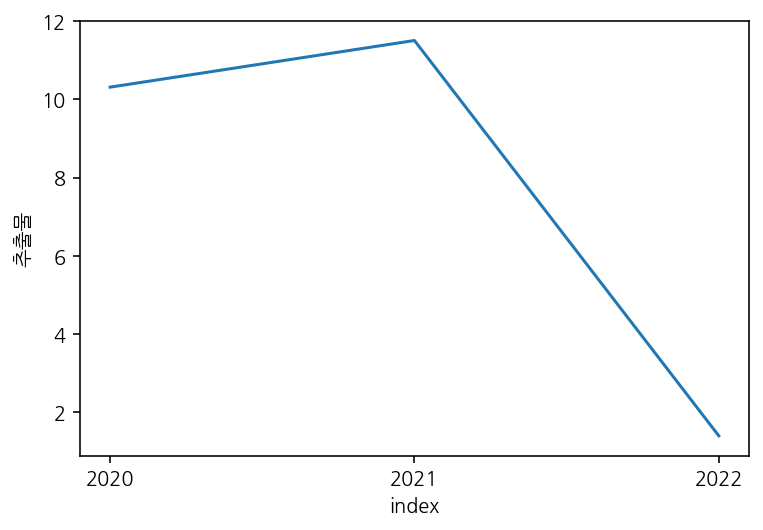

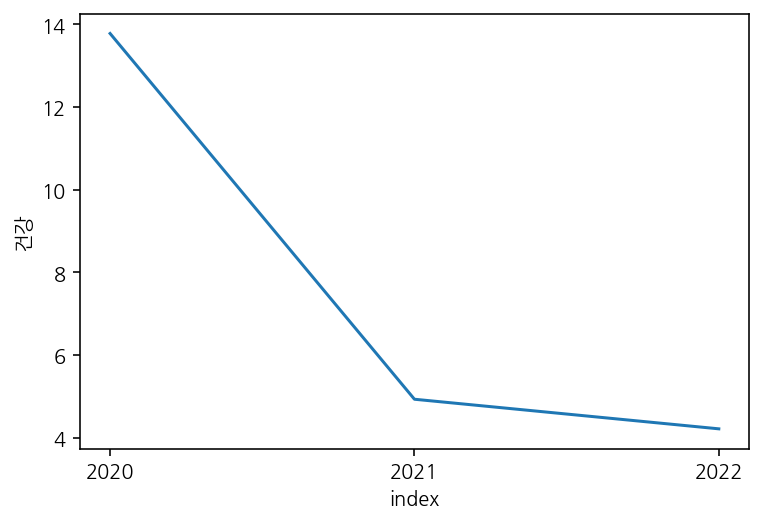

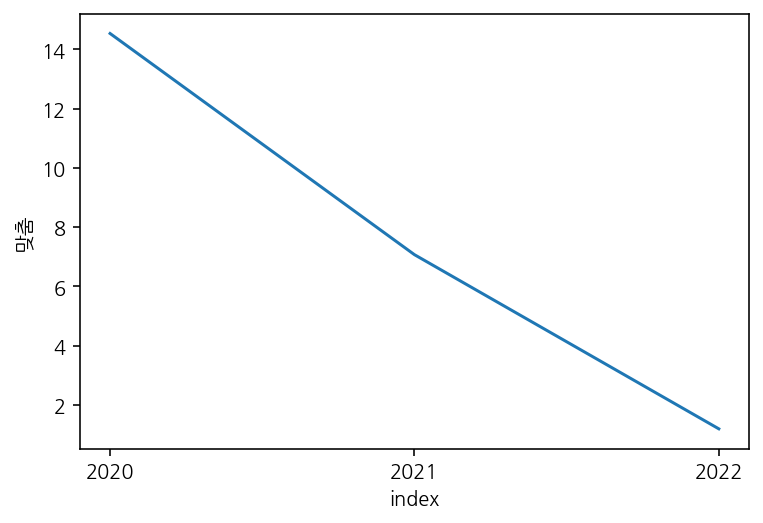

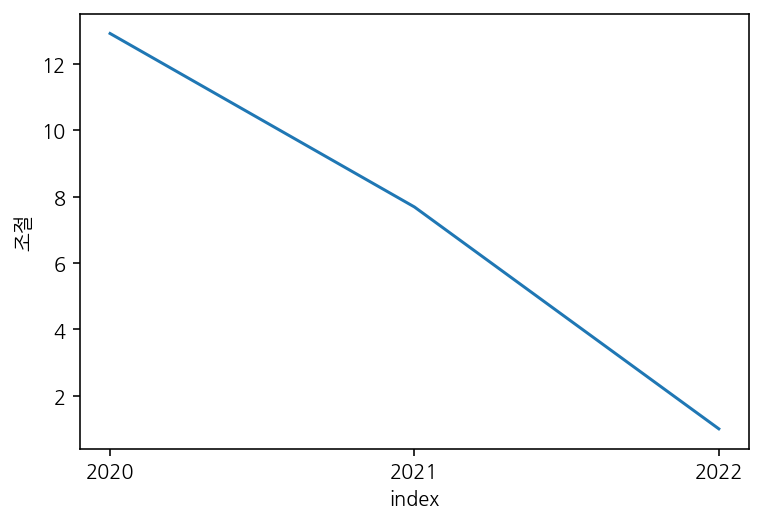

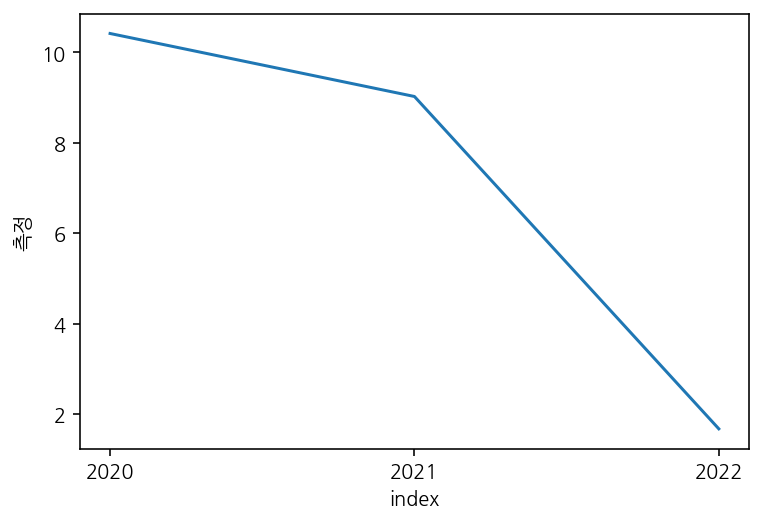

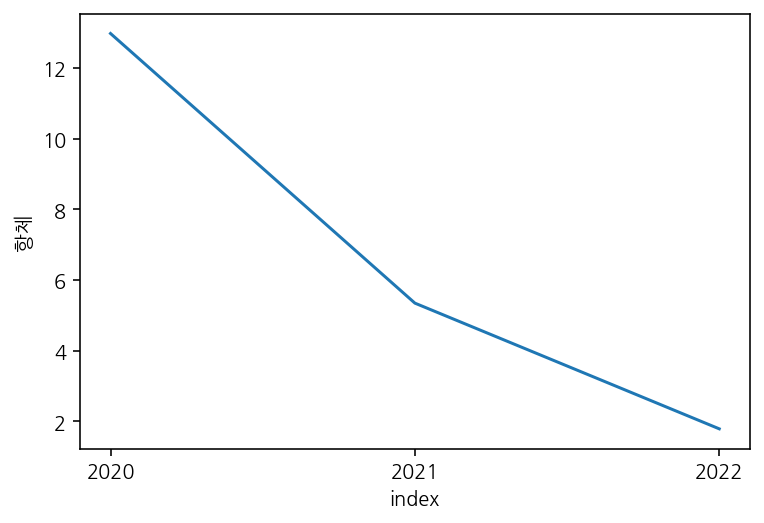

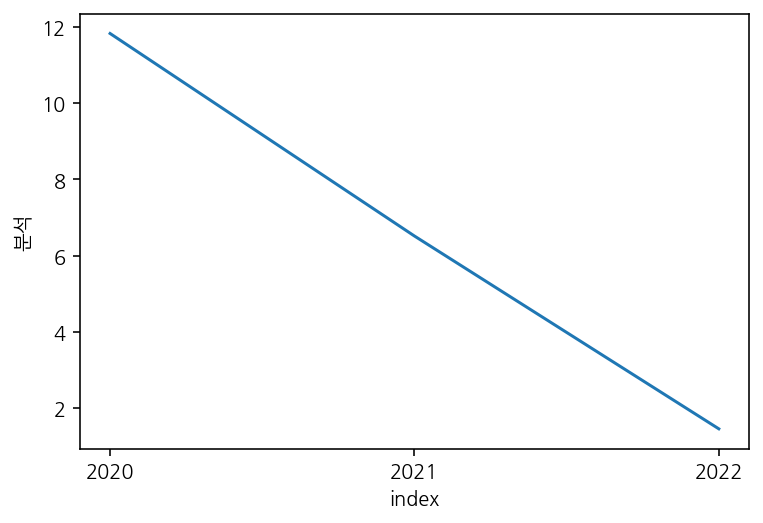

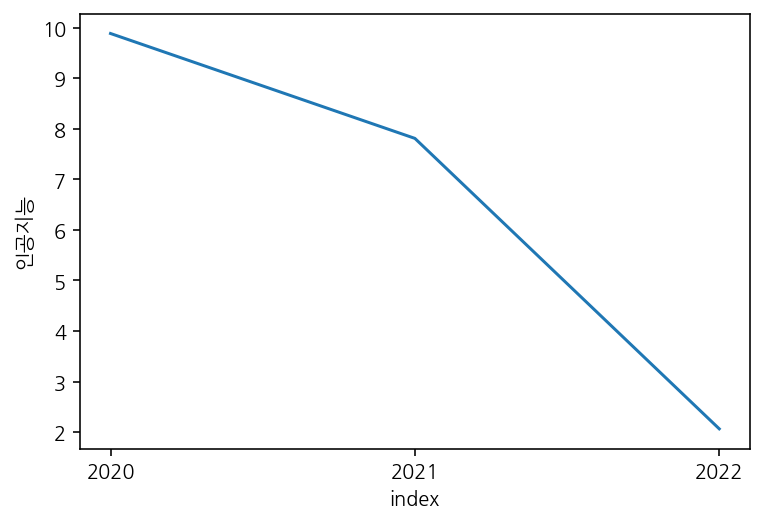

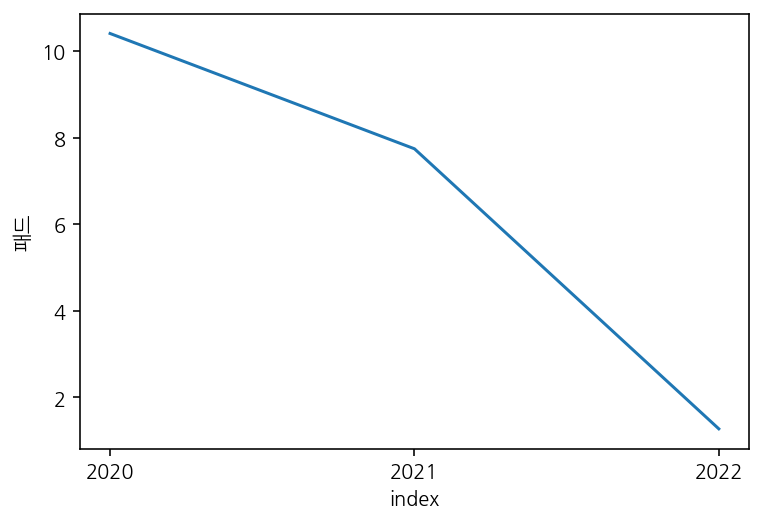

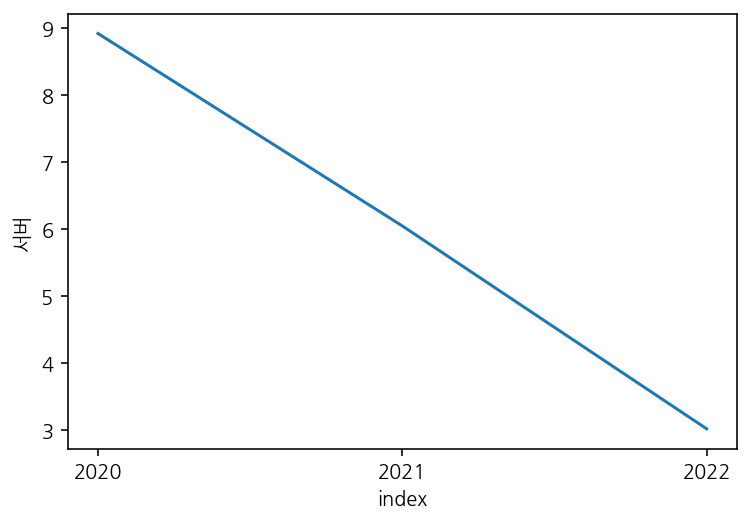

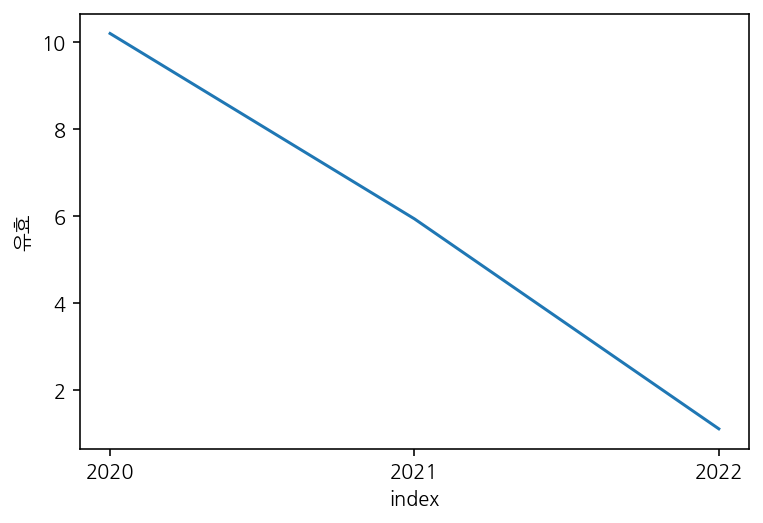

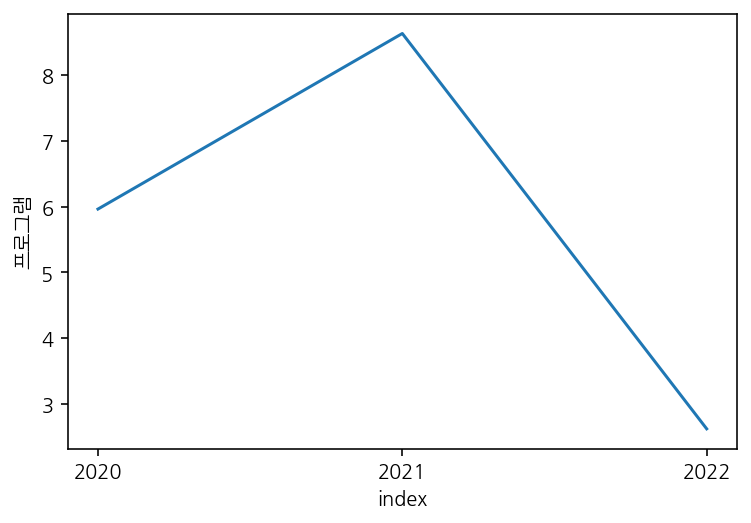

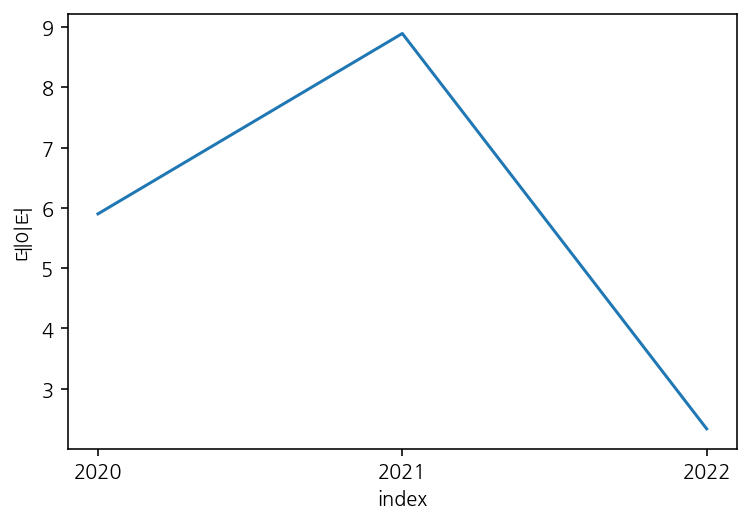

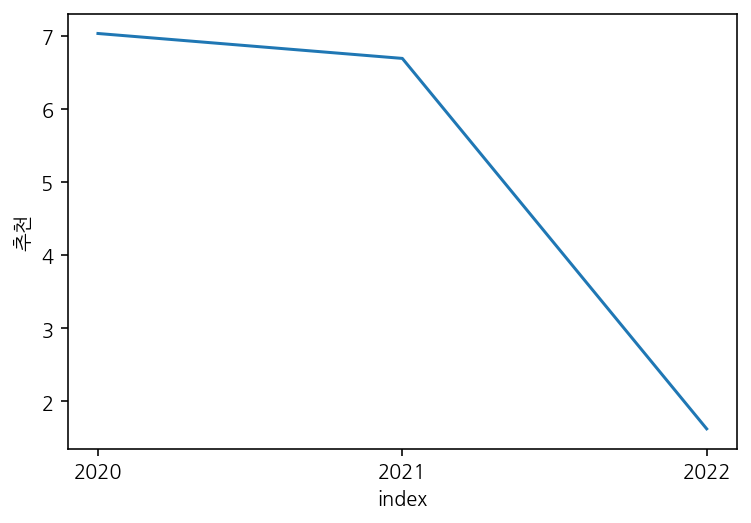

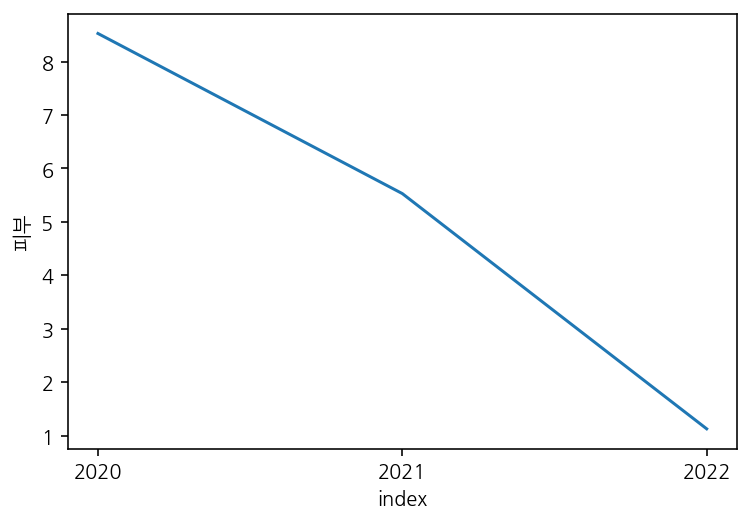

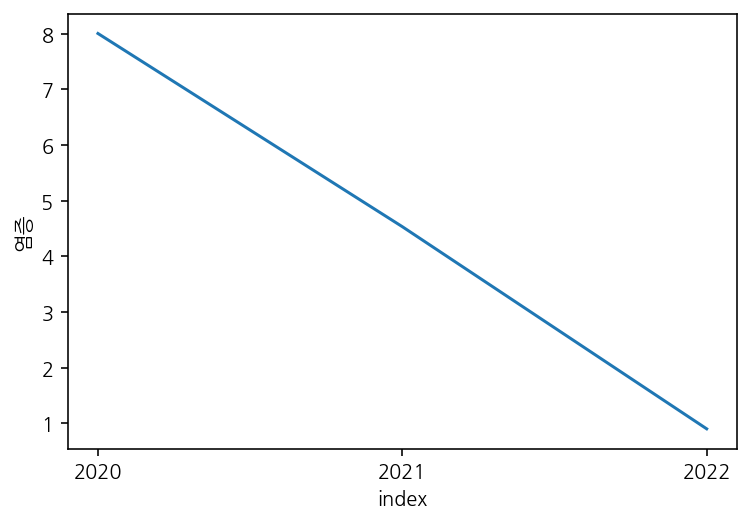

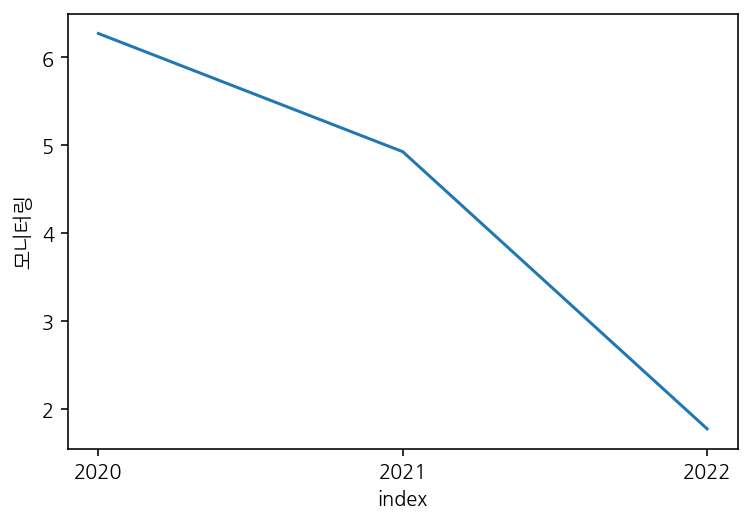

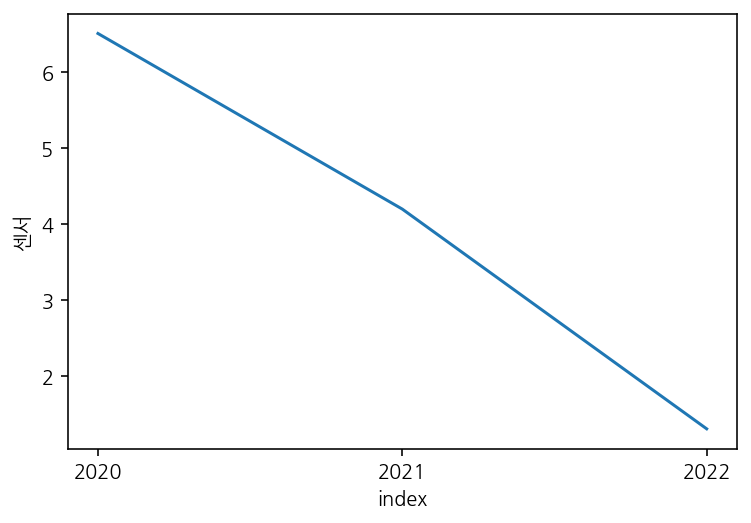

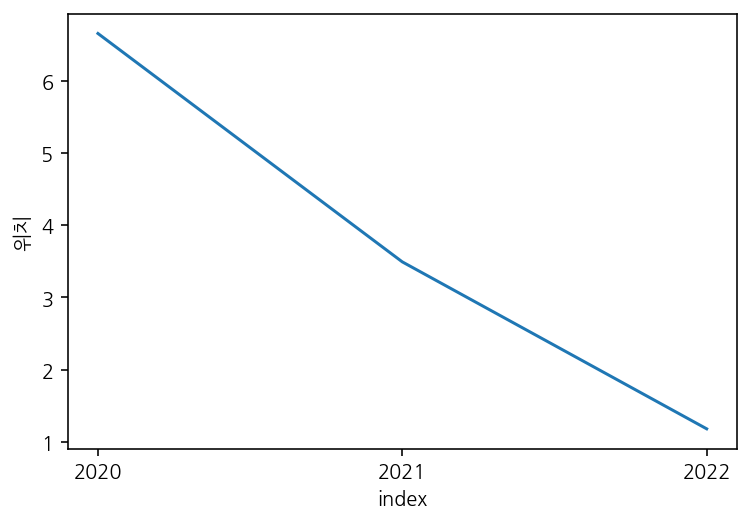

In [ ]:
for col in cols:
    sns.lineplot(data=kipristfidf, x="index", y=col)
    plt.show()